In [2]:
import cv2
import os
import random
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.utils import resample
from tqdm import tqdm
import numpy as np
import pandas as pd
from pathlib import Path
import csv
from sklearn.cluster import MiniBatchKMeans

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train_image_dir=Path("train")
train_filepaths = list(train_image_dir.glob(r'**/*.jpg'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], train_filepaths))
train_filepaths = pd.Series(train_filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')
train_df = pd.concat([train_filepaths, labels], axis=1)
train_df['Label'].value_counts()

doctor strange     345
spider-man         326
captain america    324
thanos             323
hulk               321
black widow        320
ironman            318
loki               307
Name: Label, dtype: int64

In [3]:
class_labels=list(train_df['Label'].unique())
print(class_labels)

['loki', 'black widow', 'hulk', 'doctor strange', 'captain america', 'spider-man', 'thanos', 'ironman']


In [4]:
class_dict={}
for idx,label in enumerate(class_labels):
    class_dict[label]=idx
print(class_dict)

{'loki': 0, 'black widow': 1, 'hulk': 2, 'doctor strange': 3, 'captain america': 4, 'spider-man': 5, 'thanos': 6, 'ironman': 7}


In [5]:
train_df['Label']=train_df['Label'].map(class_dict)
train_df.head()

Filepath  Label
0  Data/resized_data/train/loki/pic_202.jpg      0
1  Data/resized_data/train/loki/pic_216.jpg      0
2  Data/resized_data/train/loki/pic_028.jpg      0
3  Data/resized_data/train/loki/pic_014.jpg      0
4  Data/resized_data/train/loki/pic_174.jpg      0

In [6]:
test_image_dir = Path('Data/resized_data/valid')
test_filepaths = list(test_image_dir.glob(r'**/*.jpg'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], test_filepaths))
test_filepaths = pd.Series(test_filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')
test_data = pd.concat([test_filepaths, labels], axis=1)
test_data['Label'].value_counts()

doctor strange     61
captain america    57
spider-man         57
hulk               56
ironman            56
black widow        55
thanos             55
loki               54
Name: Label, dtype: int64

In [7]:
test_data['Label']=test_data['Label'].map(class_dict)
test_data.head()

Filepath  Label
0  Data/resized_data/valid/loki/pic_148.jpg      0
1  Data/resized_data/valid/loki/pic_015.jpg      0
2  Data/resized_data/valid/loki/pic_229.jpg      0
3  Data/resized_data/valid/loki/pic_189.jpg      0
4  Data/resized_data/valid/loki/pic_002.jpg      0

In [8]:
train_size=sum(list(train_df['Label'].value_counts()))
print(train_size)

2584


In [9]:
dico = []
sift = cv2.SIFT_create()
for path in tqdm(train_df.Filepath):
    img = cv2.imread(path)
    kp, des = sift.detectAndCompute(img, None)
    for d in des:
        dico.append(d)

100%|███████████████████████████████████████| 2584/2584 [00:37<00:00, 68.07it/s]


In [10]:
print(dico[:5])

[array([ 58.,   6.,   0.,   0.,   0.,   0.,   0.,   0., 144.,  45.,   3.,
        11.,  41.,   2.,   0.,   2.,  13.,   7.,   2.,  30., 144.,  15.,
         4.,   0.,   0.,   0.,   0.,   2.,  21.,   6.,  23.,   1.,  61.,
         4.,   0.,   0.,   0.,   0.,   0.,   1., 144.,  17.,   1.,   4.,
        26.,  18.,   3.,  25.,  25.,   4.,   6.,  16., 131., 114.,  46.,
        12.,   0.,   5.,  21.,   1.,   4.,  12., 144.,  19.,  60.,   5.,
         0.,   0.,   0.,   0.,   0.,   1., 144.,  31.,   3.,  22.,  25.,
         2.,   1.,   7.,  24.,  10.,  44., 131., 119.,  14.,   6.,   3.,
         0.,  12., 144.,  16.,   3.,   1.,  17.,   5.,  46.,   1.,   0.,
         0.,   0.,   0.,   0.,   3., 144.,   6.,   0.,   6.,  46.,   1.,
         0.,  12.,  15.,   1.,   3.,  30., 144.,   1.,   0.,   1.,   0.,
         0.,  20.,   7.,  15.,   0.,   0.,   0.], dtype=float32), array([ 21.,   0.,   0.,   9., 150.,  19.,   0.,   2., 150.,   0.,   0.,
         0.,  18.,   7.,   1.,  23.,  16.,   0.,   0.,   

In [11]:
k = np.size(class_labels) * 10
batch_size = train_size * 3

In [12]:
print(train_size)

2584


In [13]:
kmeans = MiniBatchKMeans(n_clusters=k, batch_size=batch_size, verbose=1).fit(dico)

Init 1/3 with method k-means++
Inertia for init 1/3: 3102178801.0
Init 2/3 with method k-means++
Inertia for init 2/3: 3107394087.0
Init 3/3 with method k-means++
Inertia for init 3/3: 3071831742.0
Minibatch step 1/25598: mean batch inertia: 130993.97316821465
Minibatch step 2/25598: mean batch inertia: 91882.52269831886, ewa inertia: 91882.52269831886
Minibatch step 3/25598: mean batch inertia: 90486.24798742555, ewa inertia: 91871.61375793313
Minibatch step 4/25598: mean batch inertia: 89669.8205597591, ewa inertia: 91854.41139040959
Minibatch step 5/25598: mean batch inertia: 89676.97595475154, ewa inertia: 91837.3993273993
Minibatch step 6/25598: mean batch inertia: 89802.36028499843, ewa inertia: 91821.4997917112
Minibatch step 7/25598: mean batch inertia: 89605.2739264854, ewa inertia: 91804.18466335109
Minibatch step 8/25598: mean batch inertia: 89334.72535728489, ewa inertia: 91784.89105003508
Minibatch step 9/25598: mean batch inertia: 89069.70756024768, ewa inertia: 91763.677

Minibatch step 91/25598: mean batch inertia: 88362.27658297955, ewa inertia: 90207.02380721984
Minibatch step 92/25598: mean batch inertia: 88721.0350362072, ewa inertia: 90195.41394077279
Minibatch step 93/25598: mean batch inertia: 88231.71293768562, ewa inertia: 90180.0717613213
Minibatch step 94/25598: mean batch inertia: 88282.08637337628, ewa inertia: 90165.24301072619
Minibatch step 95/25598: mean batch inertia: 88366.37537843456, ewa inertia: 90151.18865622889
Minibatch step 96/25598: mean batch inertia: 88142.47862739227, ewa inertia: 90135.49482622118
Minibatch step 97/25598: mean batch inertia: 88516.05233903427, ewa inertia: 90122.8423006021
Minibatch step 98/25598: mean batch inertia: 88574.15488867267, ewa inertia: 90110.74257658569
Minibatch step 99/25598: mean batch inertia: 87983.96160200099, ewa inertia: 90094.12627129542
Minibatch step 100/25598: mean batch inertia: 88279.10847119927, ewa inertia: 90079.94573731751
Minibatch step 101/25598: mean batch inertia: 88839.

Minibatch step 181/25598: mean batch inertia: 87824.0045724528, ewa inertia: 89214.60884650248
Minibatch step 182/25598: mean batch inertia: 88025.97772572008, ewa inertia: 89205.32220259488
Minibatch step 183/25598: mean batch inertia: 87418.01260864105, ewa inertia: 89191.35814977692
Minibatch step 184/25598: mean batch inertia: 88271.87469674078, ewa inertia: 89184.17432692558
Minibatch step 185/25598: mean batch inertia: 87654.93873151233, ewa inertia: 89172.22657780719
Minibatch step 186/25598: mean batch inertia: 88418.63505676527, ewa inertia: 89166.33885033199
Minibatch step 187/25598: mean batch inertia: 88124.9968792, ewa inertia: 89158.2029603129
Minibatch step 188/25598: mean batch inertia: 88091.71475831592, ewa inertia: 89149.87060556428
Minibatch step 189/25598: mean batch inertia: 87953.6566485095, ewa inertia: 89140.52471779285
Minibatch step 190/25598: mean batch inertia: 88149.29509449218, ewa inertia: 89132.78035002282
Minibatch step 191/25598: mean batch inertia: 8

Minibatch step 272/25598: mean batch inertia: 88065.72340212933, ewa inertia: 88669.81408769196
Minibatch step 273/25598: mean batch inertia: 88079.04674658013, ewa inertia: 88665.19848758422
Minibatch step 274/25598: mean batch inertia: 88182.55539399422, ewa inertia: 88661.42765030236
Minibatch step 275/25598: mean batch inertia: 87555.64528764233, ewa inertia: 88652.78829460841
Minibatch step 276/25598: mean batch inertia: 88092.10219373927, ewa inertia: 88648.40771591442
Minibatch step 277/25598: mean batch inertia: 87912.77449758638, ewa inertia: 88642.66029467854
Minibatch step 278/25598: mean batch inertia: 88326.06692889697, ewa inertia: 88640.18678561412
Minibatch step 279/25598: mean batch inertia: 87832.9962870204, ewa inertia: 88633.88029523626
Minibatch step 280/25598: mean batch inertia: 88567.64661720743, ewa inertia: 88633.36281881167
Minibatch step 281/25598: mean batch inertia: 88316.5461595847, ewa inertia: 88630.88756518016
Minibatch step 282/25598: mean batch inert

Minibatch step 368/25598: mean batch inertia: 88333.99995682141, ewa inertia: 88389.75777975752
Minibatch step 369/25598: mean batch inertia: 88059.94725760806, ewa inertia: 88387.18100650748
Minibatch step 370/25598: mean batch inertia: 88331.54181605714, ewa inertia: 88386.74630364636
Minibatch step 371/25598: mean batch inertia: 88012.28093113173, ewa inertia: 88383.82064697334
Minibatch step 372/25598: mean batch inertia: 88116.16219991006, ewa inertia: 88381.72946103409
Minibatch step 373/25598: mean batch inertia: 87846.7770025164, ewa inertia: 88377.54993645081
Minibatch step 374/25598: mean batch inertia: 88142.09250624944, ewa inertia: 88375.71033350634
Minibatch step 375/25598: mean batch inertia: 88091.3471822542, ewa inertia: 88373.48863555485
Minibatch step 376/25598: mean batch inertia: 87688.31455794252, ewa inertia: 88368.13544602257
Minibatch step 377/25598: mean batch inertia: 88053.27125316892, ewa inertia: 88365.67544679558
Minibatch step 378/25598: mean batch inert

Minibatch step 475/25598: mean batch inertia: 88320.18968663158, ewa inertia: 88204.56639708394
Minibatch step 476/25598: mean batch inertia: 88269.43556358656, ewa inertia: 88205.0732127304
Minibatch step 477/25598: mean batch inertia: 88167.61440852092, ewa inertia: 88204.7805512227
Minibatch step 478/25598: mean batch inertia: 88212.88103744815, ewa inertia: 88204.84383942855
Minibatch step 479/25598: mean batch inertia: 88094.03390792245, ewa inertia: 88203.97809364977
Minibatch step 480/25598: mean batch inertia: 88320.88059656635, ewa inertia: 88204.89144001728
Minibatch step 481/25598: mean batch inertia: 88432.98620279731, ewa inertia: 88206.67351925287
Minibatch step 482/25598: mean batch inertia: 88440.79207844366, ewa inertia: 88208.50266174573
Minibatch step 483/25598: mean batch inertia: 87811.92181379898, ewa inertia: 88205.40421930126
Converged (lack of improvement in inertia) at step 483/25598


In [14]:
kmeans.verbose = False
histo_list = []

for path in tqdm(train_df.Filepath):
    img = cv2.imread(path)
    kp, des = sift.detectAndCompute(img, None)
    histo = np.zeros(k)
    nkp = np.size(kp)
    for d in des:
        idx = kmeans.predict([d])
        histo[idx] += 1/nkp
    histo_list.append(histo)

100%|███████████████████████████████████████| 2584/2584 [13:44<00:00,  3.13it/s]


In [15]:
np.shape(histo_list)

(2584, 80)

In [16]:
X_train = np.array(histo_list)
y_train=list(train_df['Label'].values)

In [18]:
from sklearn.svm import SVC
svc_model=SVC(probability=True)
svc_model.fit(X_train,y_train)

SVC(probability=True)

In [19]:
result_file = open("sift.csv", "w")
result_file_obj = csv.writer(result_file)
result_file_obj.writerow(np.append("id", class_labels))

for path in tqdm(test_data.Filepath):
    img = cv2.imread(path)
    kp, des = sift.detectAndCompute(img, None)
    x = np.zeros(k)
    nkp = np.size(kp)
    for d in des:
        idx = kmeans.predict([d])
        x[idx] += 1/nkp
    res = svc_model.predict_proba([x])
    row = []
    row.append(path.split("/")[3])
    for e in res[0]:
        row.append(e)
    result_file_obj.writerow(row)
result_file.close()

100%|█████████████████████████████████████████| 451/451 [02:18<00:00,  3.25it/s]


In [20]:
result_df=pd.read_csv("sift.csv")
result_df.head()

id      loki  black widow      hulk  doctor strange  captain america  \
0  loki  0.139938     0.120530  0.179487        0.198371         0.061212   
1  loki  0.143704     0.194658  0.109490        0.046685         0.215086   
2  loki  0.169753     0.096979  0.105178        0.170414         0.112286   
3  loki  0.173549     0.107507  0.156860        0.202682         0.076793   
4  loki  0.114885     0.146943  0.059495        0.148572         0.099376   

   spider-man    thanos   ironman  
0    0.036270  0.213083  0.051109  
1    0.081415  0.121691  0.087271  
2    0.174832  0.088260  0.082299  
3    0.073053  0.066179  0.143377  
4    0.305947  0.090513  0.034268

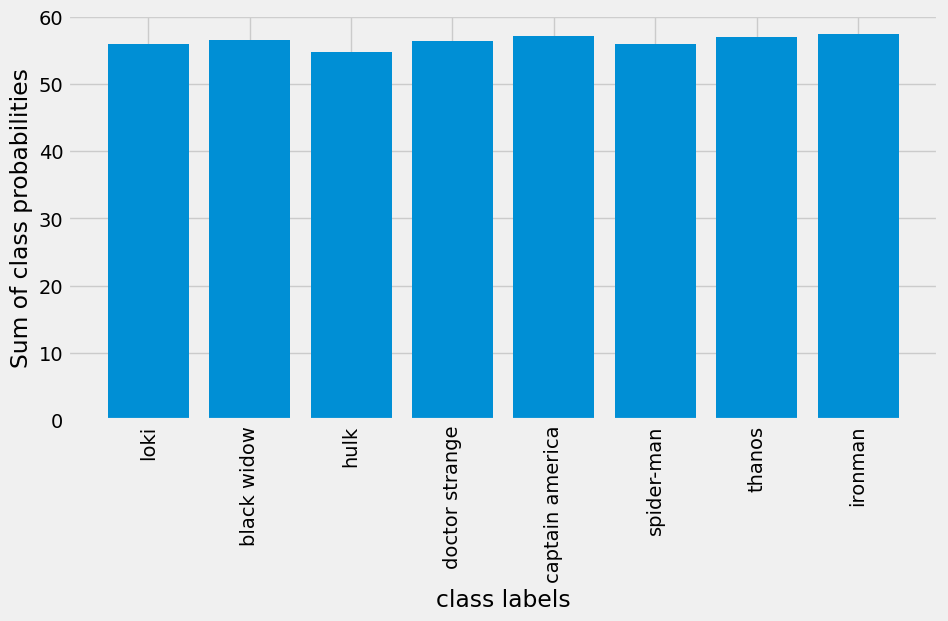

In [21]:
chart_data=[]
for label in class_labels:
  chart_data.append(abs(sum(result_df[label].values)))
with plt.style.context(style='fivethirtyeight'):
  plt.figure(figsize=(10,5))
  plt.bar(x=class_labels,height=chart_data)
  plt.xlabel(xlabel='class labels')
  plt.ylabel(ylabel='Sum of class probabilities')
  plt.xticks(rotation=90)
  plt.show()

In [22]:
prediction_=result_df.drop(labels='id',axis=1).values

In [23]:
true_labels=list(test_data['Label'].values)
print(true_labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 

In [24]:
svm_pred=[]
for pred in prediction_:
  svm_pred.append(np.argmax(pred))
print(svm_pred)

[6, 4, 5, 3, 5, 6, 3, 3, 3, 5, 0, 7, 4, 2, 0, 0, 6, 6, 7, 4, 0, 7, 4, 4, 5, 5, 2, 5, 3, 6, 4, 4, 7, 2, 7, 3, 0, 5, 2, 7, 3, 0, 7, 2, 2, 5, 5, 5, 6, 7, 0, 3, 7, 5, 4, 4, 3, 2, 2, 1, 2, 7, 7, 6, 5, 6, 1, 4, 4, 0, 2, 0, 1, 5, 7, 7, 6, 1, 7, 7, 4, 4, 5, 4, 4, 7, 1, 5, 7, 5, 5, 4, 2, 7, 4, 1, 6, 6, 6, 3, 3, 7, 5, 5, 5, 4, 6, 3, 3, 6, 1, 2, 7, 6, 6, 7, 2, 5, 5, 2, 5, 4, 3, 7, 4, 4, 0, 6, 3, 2, 7, 3, 2, 7, 6, 3, 4, 2, 6, 4, 7, 4, 2, 2, 7, 2, 6, 2, 3, 3, 6, 6, 3, 5, 2, 0, 7, 3, 2, 2, 5, 2, 4, 5, 6, 0, 3, 5, 5, 6, 3, 3, 0, 7, 6, 4, 7, 5, 3, 5, 6, 5, 1, 1, 4, 6, 1, 0, 3, 4, 0, 5, 5, 4, 5, 2, 6, 3, 3, 3, 5, 1, 1, 7, 6, 3, 4, 1, 0, 2, 3, 5, 3, 3, 3, 3, 6, 4, 4, 4, 5, 3, 7, 6, 5, 6, 5, 4, 7, 7, 4, 0, 5, 4, 7, 1, 7, 2, 0, 2, 3, 4, 4, 4, 6, 2, 5, 3, 1, 4, 4, 5, 7, 3, 4, 3, 7, 1, 4, 7, 0, 2, 5, 7, 3, 7, 7, 4, 7, 7, 2, 7, 4, 4, 4, 2, 6, 7, 5, 1, 5, 4, 7, 5, 4, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 2, 0, 5, 2, 7, 5, 7, 3, 0, 4, 7, 5, 5, 3, 5, 5, 1, 5, 5, 0, 6, 5, 7, 4, 4, 2, 3, 5, 5, 5, 3, 6, 5, 1, 5, 5, 5, 

In [25]:
svm_accuracy=accuracy_score(y_true=true_labels,y_pred=svm_pred)
print(f"Validation accuracy of SupportVectorClassifier model is {svm_accuracy*100.0:.2f}%")

Validation accuracy of SupportVectorClassifier model is 26.83%


In [26]:
from IPython.core.display import display,HTML
display(HTML("<h1>SupportVectorClassifier's classification_report</h1>"))
print(classification_report(y_true=true_labels,y_pred=svm_pred,target_names=class_labels))

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/3438807348.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display,HTML


                 precision    recall  f1-score   support

           loki       0.23      0.13      0.17        54
    black widow       0.27      0.11      0.16        55
           hulk       0.30      0.25      0.27        56
 doctor strange       0.25      0.25      0.25        61
captain america       0.23      0.26      0.25        57
     spider-man       0.30      0.49      0.38        57
         thanos       0.25      0.24      0.24        55
        ironman       0.27      0.41      0.33        56

       accuracy                           0.27       451
      macro avg       0.26      0.27      0.25       451
   weighted avg       0.26      0.27      0.26       451



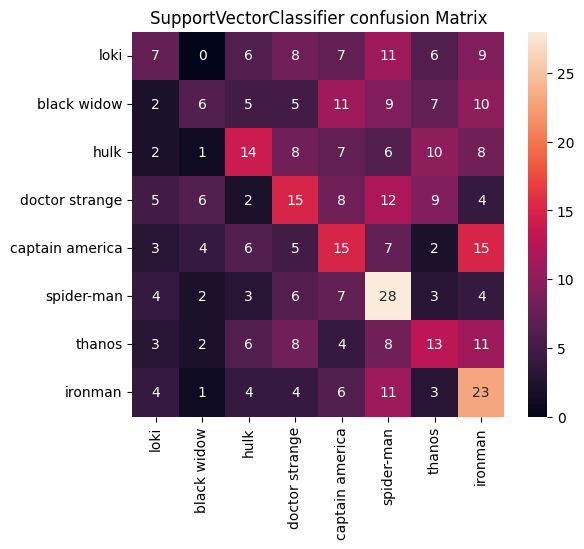

In [27]:
import seaborn as sns
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_true=true_labels,y_pred=svm_pred),
            annot=True,
            fmt=".4g",
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.title(label="SupportVectorClassifier confusion Matrix")
plt.show()

In [28]:
import pickle
with open(file='SupportVectorClassifier_model.pkl',mode='wb') as file:
  pickle.dump(obj=svc_model,file=file)

In [29]:
from skimage.util import random_noise
spY_test=list(test_data['Label'].values)

In [71]:
#SaltnPepper Filter
def ApplyingRandomNoice(amount_):
  model_labels=[]
  for filepath,label in zip(test_data['Filepath'].values,test_data['Label'].values):
    img = cv2.imread(filepath)
    img = random_noise(img, mode='s&p',amount=amount_)
    img = np.array(255*img, dtype = 'uint8')
    kp, des = sift.detectAndCompute(img, None)
    x = np.zeros(k)
    nkp = np.size(kp)
    for d in des:
        idx = kmeans.predict([d])
        x[idx] += 1/nkp
    res = svc_model.predict_proba([x])
    model_labels.append(np.argmax(res[0]))
  return model_labels

#Gussian Pixel Noise

import math
def Applyinggussainnoise(var):
  model_labels=[]
  for filepath,label in zip(test_data['Filepath'].values,test_data['Label'].values):
    img = cv2.imread(filepath)
    var = math.sqrt(var)
    img = random_noise(img, mode='gaussian',mean=0, var=var)
    img = np.array(255*img, dtype = 'uint8')
    kp, des = sift.detectAndCompute(img, None)
    x = np.zeros(k)
    nkp = np.size(kp)
    for d in des:
        idx = kmeans.predict([d])
        x[idx] += 1/nkp
    res = svc_model.predict_proba([x])
    model_labels.append(np.argmax(res[0]))
  return model_labels


#Contrastbrightness
def Applycontrastbright(alpha, beta):
  model_labels=[]
  for filepath,label in zip(test_data['Filepath'].values,test_data['Label'].values):
    img = cv2.imread(filepath)
    img = cv2.addWeighted(img, alpha, img, 0, beta)
    img = np.array(255*img, dtype = 'uint8')
    kp, des = sift.detectAndCompute(img, None)
    x = np.zeros(k)
    nkp = np.size(kp)
    for d in des:
        idx = kmeans.predict([d])
        x[idx] += 1/nkp
    res = svc_model.predict_proba([x])
    model_labels.append(np.argmax(res[0]))
  return model_labels


#Gussianblur
def Applygussianblur(val):
  model_labels=[]
  for filepath,label in zip(test_data['Filepath'].values,test_data['Label'].values):
    img = cv2.imread(filepath)
    img = cv2.GaussianBlur(img,(3,3),val)
    img = np.array(255*img, dtype = 'uint8')
    kp, des = sift.detectAndCompute(img, None)
    x = np.zeros(k)
    nkp = np.size(kp)
    for d in des:
        idx = kmeans.predict([d])
        x[idx] += 1/nkp
    res = svc_model.predict_proba([x])
    model_labels.append(np.argmax(res[0]))
  return model_labels

#Occlusion
def Applyocclusion(square_edge_length):
  model_labels=[]
  for filepath,label in zip(test_data['Filepath'].values,test_data['Label'].values):
    img = cv2.imread(filepath)
    h, w, _ = img.shape
    img = cv2.rectangle(img, (square_edge_length,square_edge_length), (w //2 , h//2), (0, 0, 0), cv2.FILLED)
    img = np.array(255*img, dtype = 'uint8')
    kp, des = sift.detectAndCompute(img, None)
    x = np.zeros(k)
    nkp = np.size(kp)
    for d in des:
        idx = kmeans.predict([d])
        x[idx] += 1/nkp
    res = svc_model.predict_proba([x])
    model_labels.append(np.argmax(res[0]))
  return model_labels


In [34]:
def classificationMetrics(true_,prediction_,class_labels,amount_):
  cr_info=classification_report(y_true=true_,y_pred=prediction_,target_names=class_labels,output_dict=True)
  df_f1score=pd.DataFrame(data=cr_info)
  df_f1score=df_f1score[class_labels]
  df_f1score=df_f1score.T
  df_f1score=df_f1score[['f1-score']]
  df_f1score=df_f1score.T
  df_f1score=df_f1score.reset_index(drop=True)
  model_accuracy=accuracy_score(y_true=true_,y_pred=prediction_)
  print(f"model validation accuracy for {amount_} amount perturbation is {model_accuracy*100.0:.2f}%",'\n')
  print(classification_report(y_true=true_,y_pred=prediction_,target_names=class_labels))
  plt.figure(figsize=(6,6))
  sns.heatmap(confusion_matrix(y_true=true_,y_pred=prediction_),
              annot=True,
              fmt=".4g",
              xticklabels=class_labels,
              yticklabels=class_labels,
            cmap=plt.cm.Reds)
  plt.title(label=f"confusion Matrix for {amount_} amount perturbation")
  plt.show()
  return df_f1score

model validation accuracy for 0.0 amount perturbation is 27.05% 

                 precision    recall  f1-score   support

           loki       0.24      0.15      0.18        54
    black widow       0.27      0.11      0.16        55
           hulk       0.31      0.25      0.28        56
 doctor strange       0.28      0.28      0.28        61
captain america       0.21      0.23      0.22        57
     spider-man       0.31      0.49      0.38        57
         thanos       0.25      0.24      0.24        55
        ironman       0.27      0.41      0.33        56

       accuracy                           0.27       451
      macro avg       0.27      0.27      0.26       451
   weighted avg       0.27      0.27      0.26       451



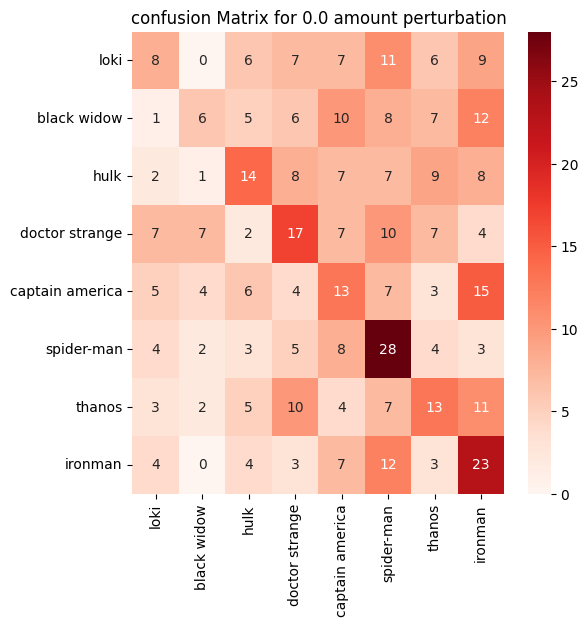

model validation accuracy for 0.0 amount perturbation is 27.05% 

                 precision    recall  f1-score   support

           loki       0.24      0.15      0.18        54
    black widow       0.27      0.11      0.16        55
           hulk       0.31      0.25      0.28        56
 doctor strange       0.28      0.28      0.28        61
captain america       0.21      0.23      0.22        57
     spider-man       0.31      0.49      0.38        57
         thanos       0.25      0.24      0.24        55
        ironman       0.27      0.41      0.33        56

       accuracy                           0.27       451
      macro avg       0.27      0.27      0.26       451
   weighted avg       0.27      0.27      0.26       451



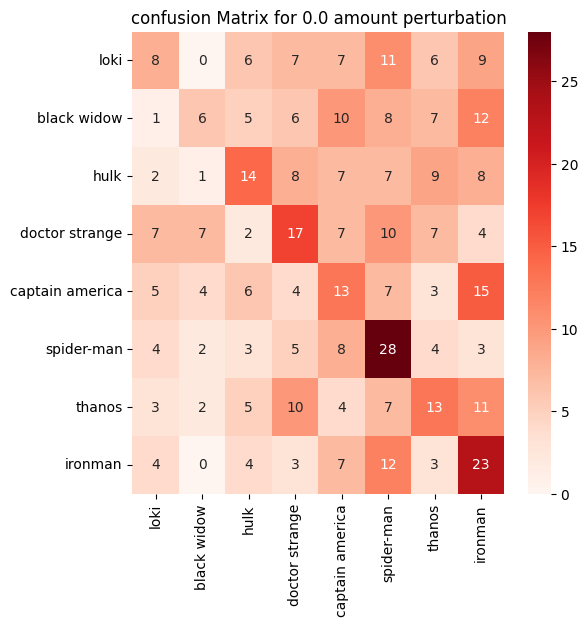

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/1103940107.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp = df_sp.append(df,ignore_index=True)


model validation accuracy for 0.02 amount perturbation is 28.82% 

                 precision    recall  f1-score   support

           loki       0.44      0.20      0.28        54
    black widow       0.35      0.11      0.17        55
           hulk       0.42      0.20      0.27        56
 doctor strange       0.23      0.18      0.20        61
captain america       0.27      0.21      0.24        57
     spider-man       0.25      0.72      0.37        57
         thanos       0.29      0.22      0.25        55
        ironman       0.30      0.46      0.36        56

       accuracy                           0.29       451
      macro avg       0.32      0.29      0.27       451
   weighted avg       0.32      0.29      0.27       451



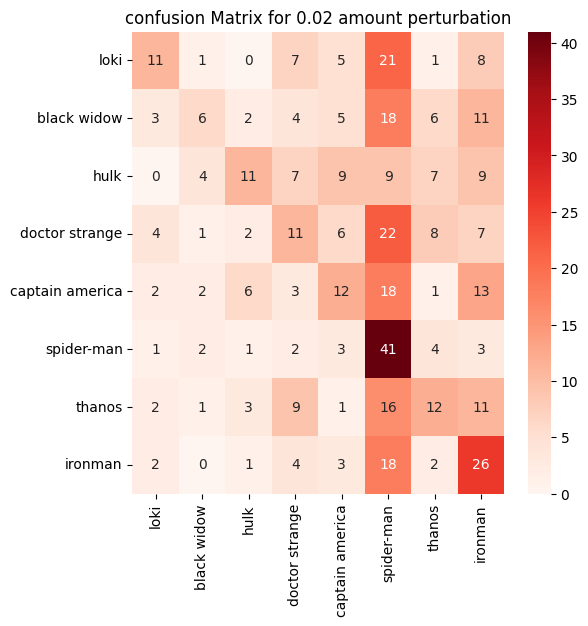

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/1103940107.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp = df_sp.append(df,ignore_index=True)


model validation accuracy for 0.04 amount perturbation is 24.83% 

                 precision    recall  f1-score   support

           loki       0.27      0.07      0.12        54
    black widow       0.28      0.09      0.14        55
           hulk       0.39      0.16      0.23        56
 doctor strange       0.23      0.16      0.19        61
captain america       0.29      0.16      0.20        57
     spider-man       0.23      0.75      0.35        57
         thanos       0.22      0.13      0.16        55
        ironman       0.24      0.45      0.31        56

       accuracy                           0.25       451
      macro avg       0.27      0.25      0.21       451
   weighted avg       0.27      0.25      0.21       451



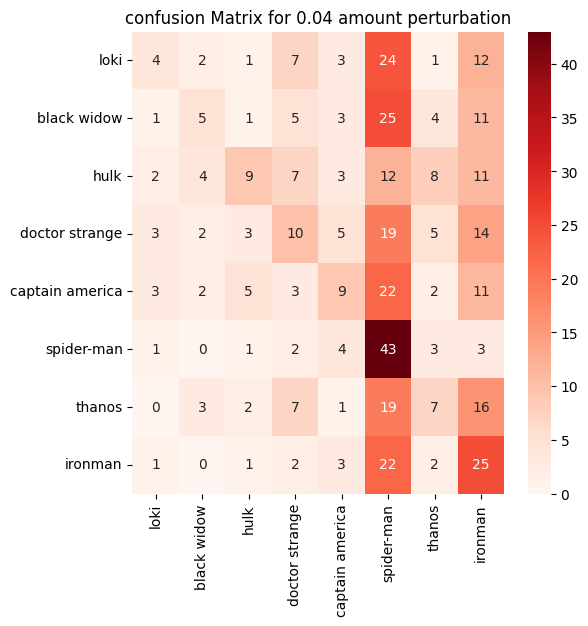

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/1103940107.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp = df_sp.append(df,ignore_index=True)


model validation accuracy for 0.06 amount perturbation is 23.50% 

                 precision    recall  f1-score   support

           loki       0.29      0.04      0.07        54
    black widow       0.27      0.11      0.16        55
           hulk       0.38      0.18      0.24        56
 doctor strange       0.24      0.13      0.17        61
captain america       0.43      0.05      0.09        57
     spider-man       0.20      0.79      0.31        57
         thanos       0.19      0.13      0.15        55
        ironman       0.28      0.45      0.34        56

       accuracy                           0.24       451
      macro avg       0.29      0.23      0.19       451
   weighted avg       0.29      0.24      0.19       451



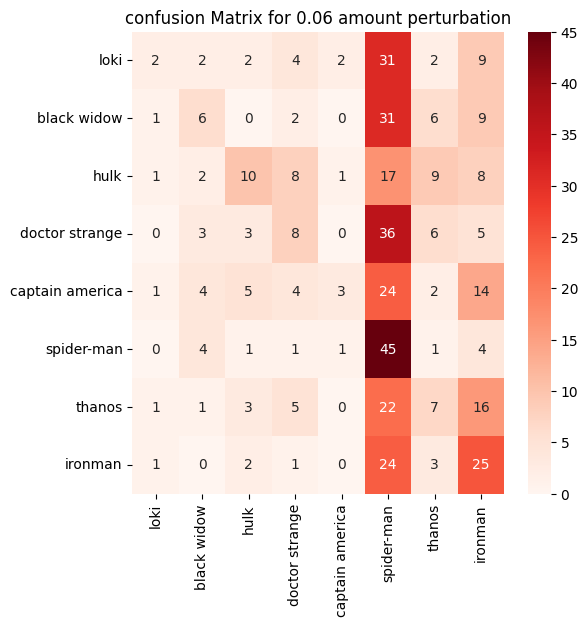

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/1103940107.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp = df_sp.append(df,ignore_index=True)


model validation accuracy for 0.08 amount perturbation is 17.96% 

                 precision    recall  f1-score   support

           loki       0.33      0.02      0.04        54
    black widow       0.12      0.05      0.07        55
           hulk       0.33      0.16      0.22        56
 doctor strange       0.18      0.08      0.11        61
captain america       0.33      0.02      0.03        57
     spider-man       0.14      0.77      0.24        57
         thanos       0.24      0.13      0.17        55
        ironman       0.39      0.20      0.26        56

       accuracy                           0.18       451
      macro avg       0.26      0.18      0.14       451
   weighted avg       0.26      0.18      0.14       451



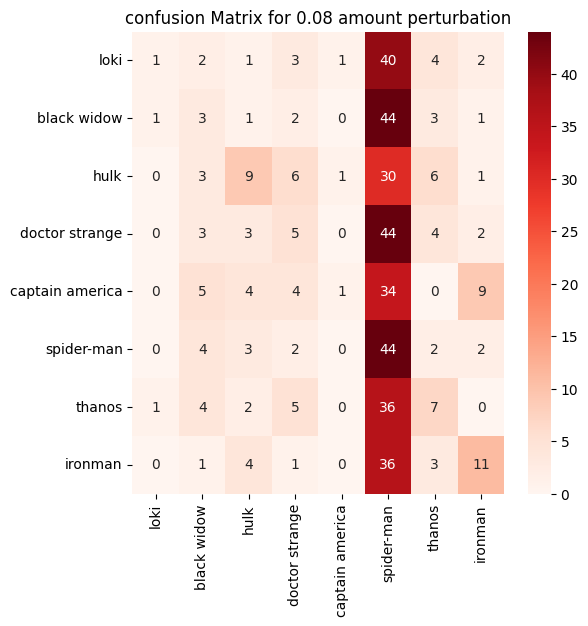

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/1103940107.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp = df_sp.append(df,ignore_index=True)


model validation accuracy for 0.1 amount perturbation is 13.75% 

                 precision    recall  f1-score   support

           loki       0.00      0.00      0.00        54
    black widow       0.12      0.04      0.06        55
           hulk       0.23      0.11      0.15        56
 doctor strange       0.15      0.05      0.07        61
captain america       0.00      0.00      0.00        57
     spider-man       0.13      0.82      0.23        57
         thanos       0.10      0.04      0.05        55
        ironman       0.17      0.04      0.06        56

       accuracy                           0.14       451
      macro avg       0.11      0.14      0.08       451
   weighted avg       0.11      0.14      0.08       451



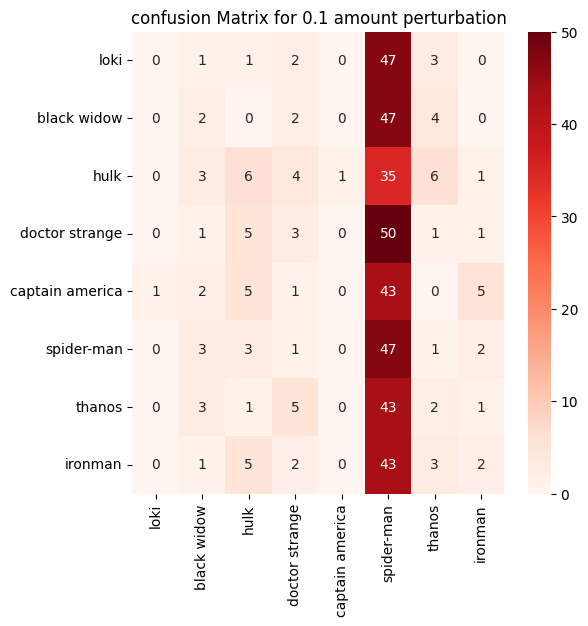

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/1103940107.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp = df_sp.append(df,ignore_index=True)


model validation accuracy for 0.12000000000000001 amount perturbation is 13.30% 

                 precision    recall  f1-score   support

           loki       0.00      0.00      0.00        54
    black widow       0.00      0.00      0.00        55
           hulk       0.30      0.12      0.18        56
 doctor strange       0.00      0.00      0.00        61
captain america       0.00      0.00      0.00        57
     spider-man       0.13      0.86      0.23        57
         thanos       0.21      0.05      0.09        55
        ironman       0.20      0.02      0.03        56

       accuracy                           0.13       451
      macro avg       0.11      0.13      0.07       451
   weighted avg       0.11      0.13      0.07       451



/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaa

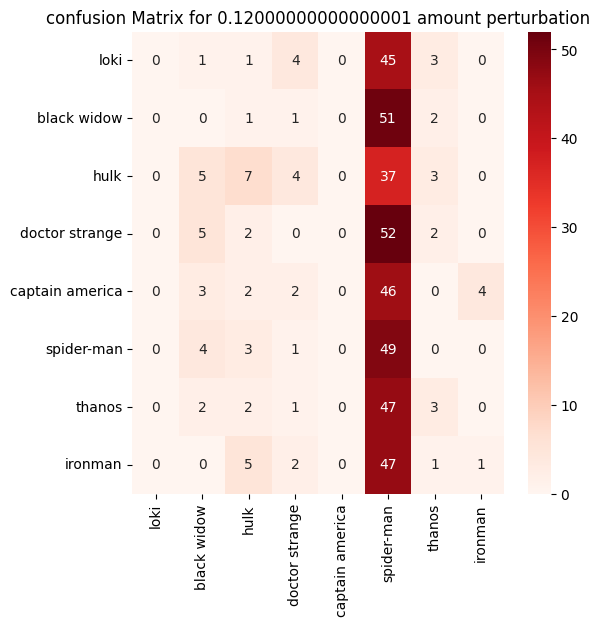

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/1103940107.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp = df_sp.append(df,ignore_index=True)


model validation accuracy for 0.14 amount perturbation is 12.86% 

                 precision    recall  f1-score   support

           loki       0.00      0.00      0.00        54
    black widow       0.04      0.02      0.02        55
           hulk       0.35      0.14      0.20        56
 doctor strange       0.00      0.00      0.00        61
captain america       0.00      0.00      0.00        57
     spider-man       0.13      0.84      0.22        57
         thanos       0.08      0.02      0.03        55
        ironman       0.00      0.00      0.00        56

       accuracy                           0.13       451
      macro avg       0.07      0.13      0.06       451
   weighted avg       0.07      0.13      0.06       451



/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaa

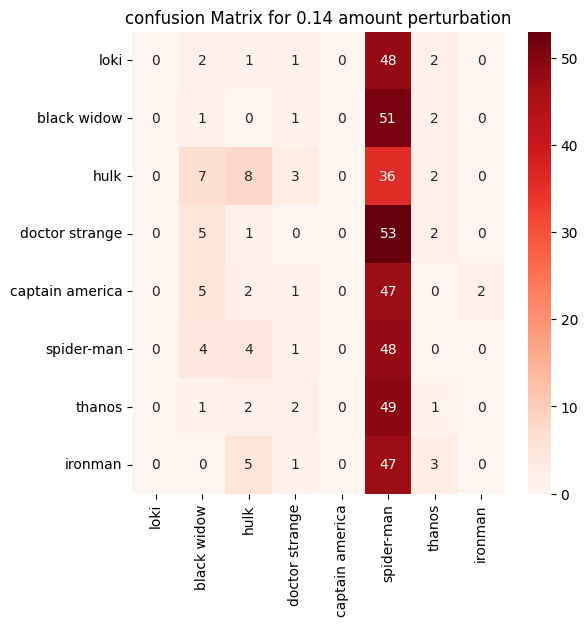

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/1103940107.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp = df_sp.append(df,ignore_index=True)


model validation accuracy for 0.16 amount perturbation is 12.86% 

                 precision    recall  f1-score   support

           loki       0.00      0.00      0.00        54
    black widow       0.06      0.02      0.03        55
           hulk       0.32      0.11      0.16        56
 doctor strange       0.17      0.03      0.05        61
captain america       0.00      0.00      0.00        57
     spider-man       0.12      0.86      0.22        57
         thanos       0.00      0.00      0.00        55
        ironman       0.00      0.00      0.00        56

       accuracy                           0.13       451
      macro avg       0.08      0.13      0.06       451
   weighted avg       0.08      0.13      0.06       451



/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaa

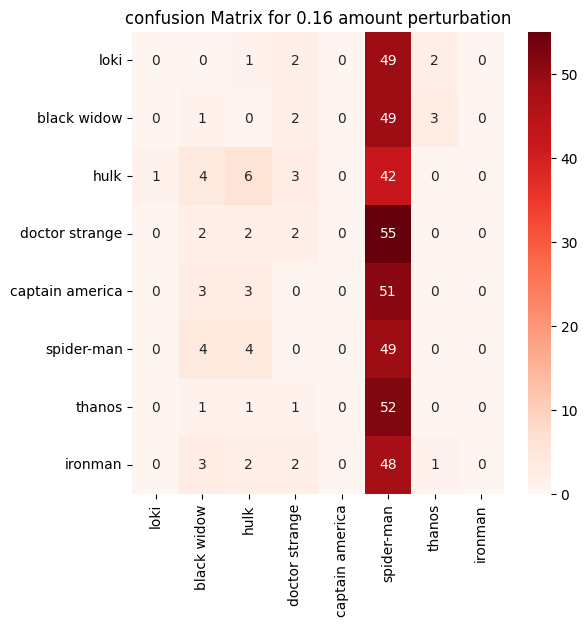

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/1103940107.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp = df_sp.append(df,ignore_index=True)


model validation accuracy for 0.18 amount perturbation is 12.42% 

                 precision    recall  f1-score   support

           loki       0.00      0.00      0.00        54
    black widow       0.04      0.02      0.02        55
           hulk       0.28      0.09      0.14        56
 doctor strange       0.07      0.02      0.03        61
captain america       0.00      0.00      0.00        57
     spider-man       0.12      0.84      0.22        57
         thanos       0.20      0.02      0.03        55
        ironman       0.00      0.00      0.00        56

       accuracy                           0.12       451
      macro avg       0.09      0.12      0.05       451
   weighted avg       0.09      0.12      0.05       451



/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaa

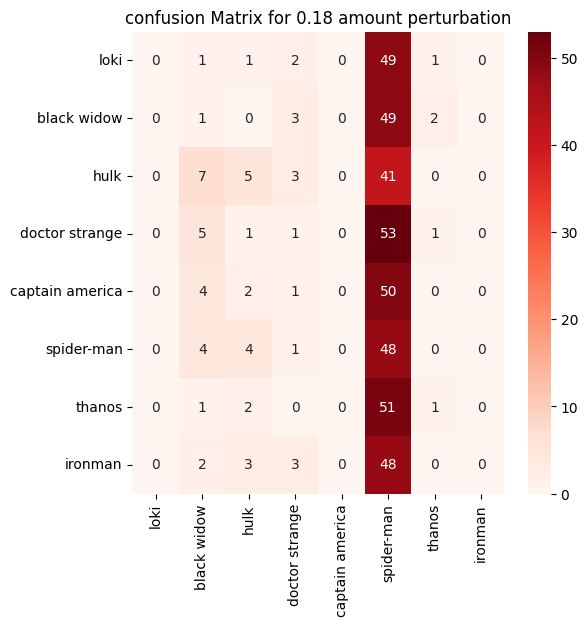

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/1103940107.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp = df_sp.append(df,ignore_index=True)


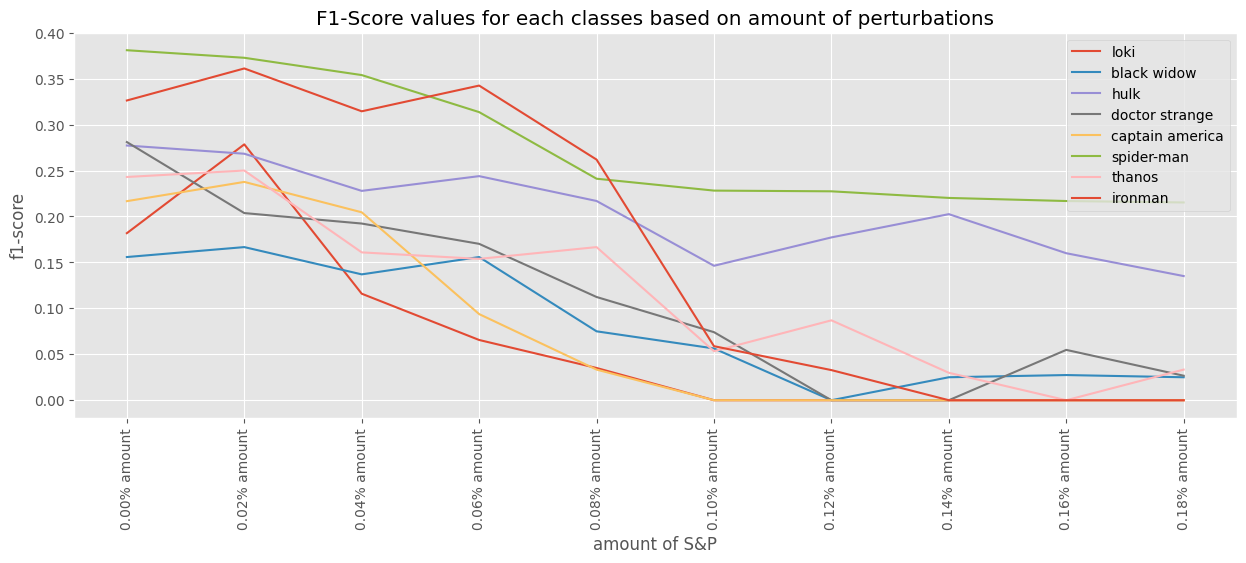

In [49]:
#salt and pepper pertubation
def saltPepperNoise(noise):
    model_labels=ApplyingRandomNoice(amount_=noise)
    return classificationMetrics(true_=spY_test,prediction_=model_labels,class_labels=class_labels,amount_=noise)
inc_sp = 0.02
start_sp = 0.00

df_sp = pd.DataFrame()
while start_sp <= 0.18:
    df = pd.DataFrame()
    df = pd.DataFrame(saltPepperNoise(start_sp))
    start_sp += inc_sp
    df_sp = df_sp.append(df,ignore_index=True)
    
df_sp.head(10)

df_sp['amount of S&P']=["0.00% amount","0.02% amount","0.04% amount","0.06% amount","0.08% amount","0.10% amount","0.12% amount","0.14% amount","0.16% amount","0.18% amount"]
df_sp=df_sp.set_index("amount of S&P")
with plt.style.context(style="ggplot"):
  lines_=df_sp.plot.line(figsize=(15,5))
  plt.title(label="F1-Score values for each classes based on amount of perturbations")
  plt.ylabel(ylabel="f1-score")
  plt.xticks(range(0,len(df_sp.index)), df_sp.index)
  plt.xticks(rotation=90)
  plt.show()


/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaa

model validation accuracy for 1.0 amount perturbation is 17.29% 

                 precision    recall  f1-score   support

           loki       0.00      0.00      0.00        54
    black widow       0.00      0.00      0.00        55
           hulk       0.21      0.46      0.29        56
 doctor strange       0.18      0.26      0.21        61
captain america       0.00      0.00      0.00        57
     spider-man       0.15      0.60      0.25        57
         thanos       0.40      0.04      0.07        55
        ironman       0.00      0.00      0.00        56

       accuracy                           0.17       451
      macro avg       0.12      0.17      0.10       451
   weighted avg       0.12      0.17      0.10       451



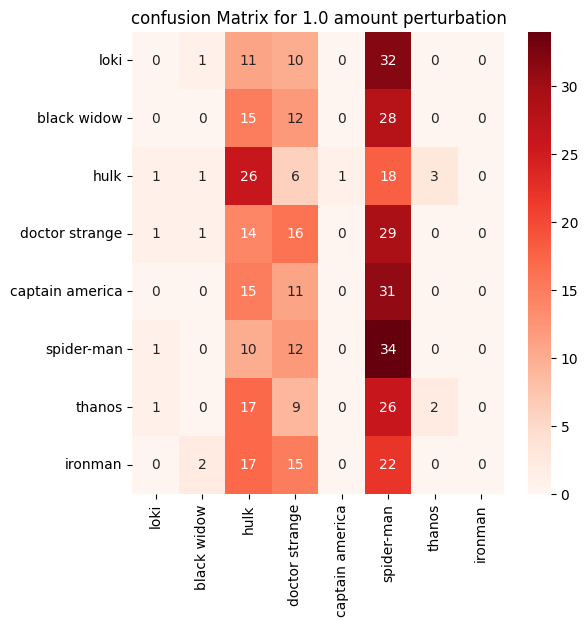

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/2914414530.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_contrast = df_contrast.append(df,ignore_index=True)


model validation accuracy for 1.01 amount perturbation is 17.07% 

                 precision    recall  f1-score   support

           loki       0.00      0.00      0.00        54
    black widow       0.00      0.00      0.00        55
           hulk       0.21      0.46      0.29        56
 doctor strange       0.19      0.28      0.23        61
captain america       0.00      0.00      0.00        57
     spider-man       0.15      0.56      0.24        57
         thanos       0.29      0.04      0.06        55
        ironman       0.00      0.00      0.00        56

       accuracy                           0.17       451
      macro avg       0.10      0.17      0.10       451
   weighted avg       0.11      0.17      0.10       451



/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaa

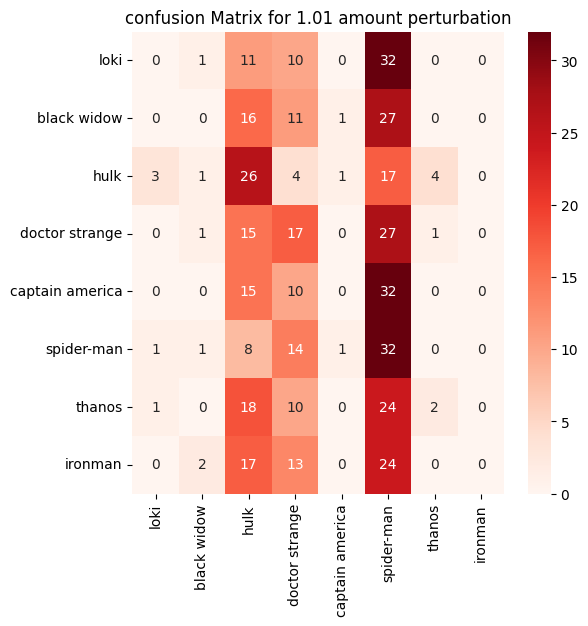

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/2914414530.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_contrast = df_contrast.append(df,ignore_index=True)


model validation accuracy for 1.02 amount perturbation is 17.29% 

                 precision    recall  f1-score   support

           loki       0.00      0.00      0.00        54
    black widow       0.00      0.00      0.00        55
           hulk       0.22      0.48      0.30        56
 doctor strange       0.18      0.28      0.22        61
captain america       0.00      0.00      0.00        57
     spider-man       0.15      0.56      0.24        57
         thanos       0.22      0.04      0.06        55
        ironman       0.00      0.00      0.00        56

       accuracy                           0.17       451
      macro avg       0.10      0.17      0.10       451
   weighted avg       0.10      0.17      0.11       451



/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaa

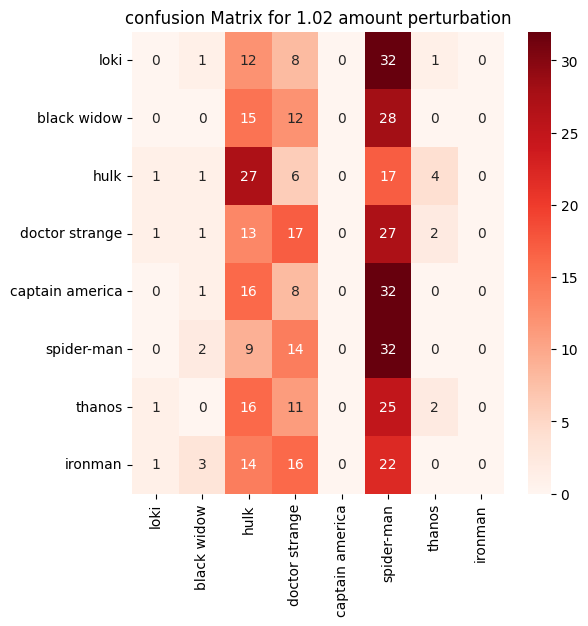

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/2914414530.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_contrast = df_contrast.append(df,ignore_index=True)


model validation accuracy for 1.03 amount perturbation is 16.63% 

                 precision    recall  f1-score   support

           loki       0.00      0.00      0.00        54
    black widow       0.00      0.00      0.00        55
           hulk       0.21      0.46      0.29        56
 doctor strange       0.16      0.25      0.20        61
captain america       0.00      0.00      0.00        57
     spider-man       0.15      0.58      0.24        57
         thanos       0.14      0.02      0.03        55
        ironman       0.00      0.00      0.00        56

       accuracy                           0.17       451
      macro avg       0.08      0.16      0.10       451
   weighted avg       0.09      0.17      0.10       451



/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaa

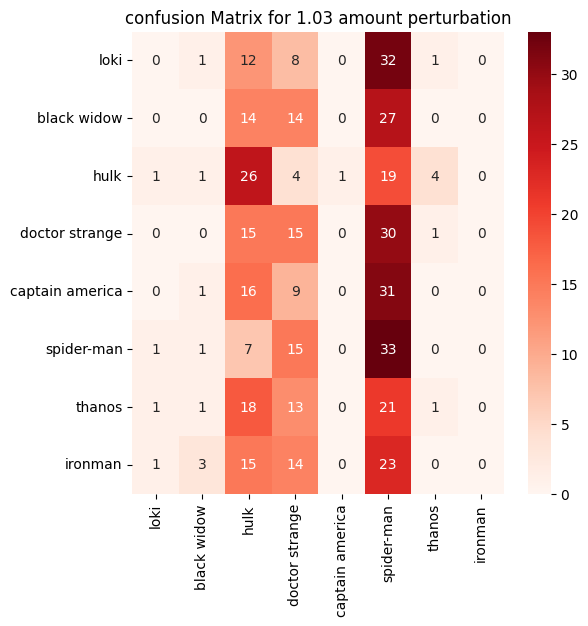

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/2914414530.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_contrast = df_contrast.append(df,ignore_index=True)


model validation accuracy for 1.04 amount perturbation is 17.74% 

                 precision    recall  f1-score   support

           loki       0.00      0.00      0.00        54
    black widow       0.00      0.00      0.00        55
           hulk       0.22      0.48      0.30        56
 doctor strange       0.17      0.25      0.20        61
captain america       0.00      0.00      0.00        57
     spider-man       0.16      0.61      0.25        57
         thanos       0.38      0.05      0.10        55
        ironman       0.00      0.00      0.00        56

       accuracy                           0.18       451
      macro avg       0.12      0.17      0.11       451
   weighted avg       0.12      0.18      0.11       451



/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaa

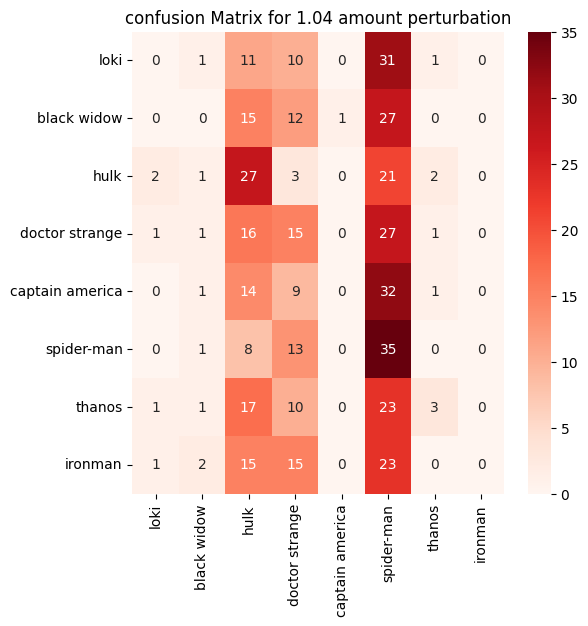

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/2914414530.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_contrast = df_contrast.append(df,ignore_index=True)


model validation accuracy for 1.05 amount perturbation is 16.85% 

                 precision    recall  f1-score   support

           loki       0.00      0.00      0.00        54
    black widow       0.00      0.00      0.00        55
           hulk       0.22      0.48      0.30        56
 doctor strange       0.17      0.25      0.20        61
captain america       0.00      0.00      0.00        57
     spider-man       0.15      0.58      0.24        57
         thanos       0.17      0.02      0.03        55
        ironman       0.00      0.00      0.00        56

       accuracy                           0.17       451
      macro avg       0.09      0.17      0.10       451
   weighted avg       0.09      0.17      0.10       451



/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaa

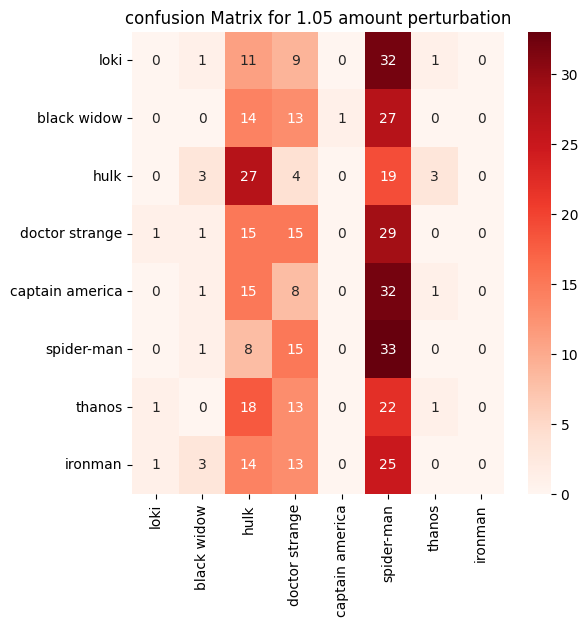

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/2914414530.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_contrast = df_contrast.append(df,ignore_index=True)


model validation accuracy for 1.1 amount perturbation is 17.74% 

                 precision    recall  f1-score   support

           loki       0.14      0.02      0.03        54
    black widow       0.00      0.00      0.00        55
           hulk       0.22      0.50      0.30        56
 doctor strange       0.17      0.26      0.21        61
captain america       0.00      0.00      0.00        57
     spider-man       0.17      0.60      0.26        57
         thanos       0.17      0.02      0.03        55
        ironman       0.00      0.00      0.00        56

       accuracy                           0.18       451
      macro avg       0.11      0.17      0.10       451
   weighted avg       0.11      0.18      0.11       451



/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaa

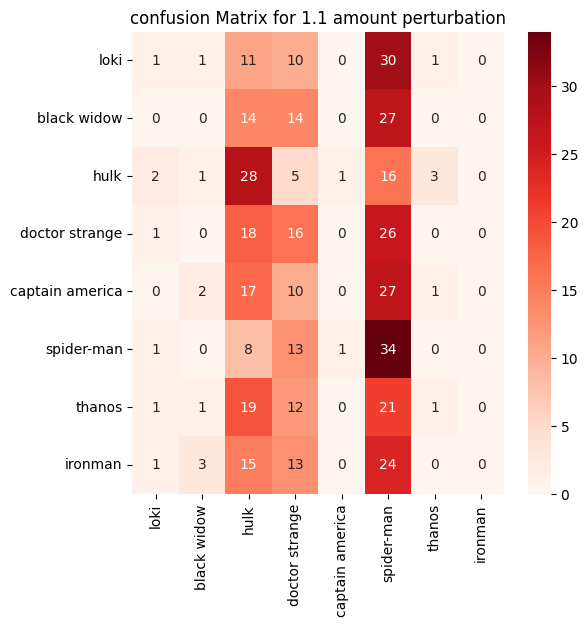

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/2914414530.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_contrast = df_contrast.append(df,ignore_index=True)


model validation accuracy for 1.15 amount perturbation is 17.52% 

                 precision    recall  f1-score   support

           loki       0.00      0.00      0.00        54
    black widow       0.00      0.00      0.00        55
           hulk       0.21      0.46      0.29        56
 doctor strange       0.18      0.26      0.21        61
captain america       0.00      0.00      0.00        57
     spider-man       0.17      0.63      0.26        57
         thanos       0.20      0.02      0.03        55
        ironman       0.00      0.00      0.00        56

       accuracy                           0.18       451
      macro avg       0.09      0.17      0.10       451
   weighted avg       0.10      0.18      0.10       451



/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaa

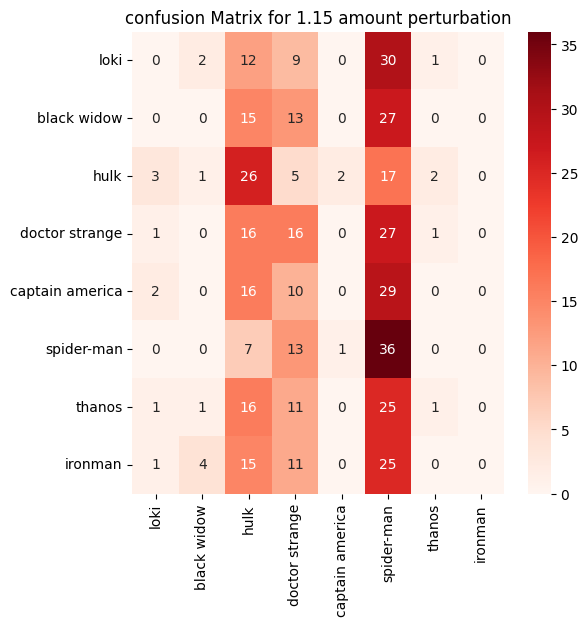

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/2914414530.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_contrast = df_contrast.append(df,ignore_index=True)
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metr

model validation accuracy for 1.2 amount perturbation is 16.19% 

                 precision    recall  f1-score   support

           loki       0.00      0.00      0.00        54
    black widow       0.00      0.00      0.00        55
           hulk       0.20      0.46      0.28        56
 doctor strange       0.15      0.23      0.18        61
captain america       0.00      0.00      0.00        57
     spider-man       0.15      0.54      0.24        57
         thanos       0.29      0.04      0.06        55
        ironman       0.00      0.00      0.00        56

       accuracy                           0.16       451
      macro avg       0.10      0.16      0.10       451
   weighted avg       0.10      0.16      0.10       451



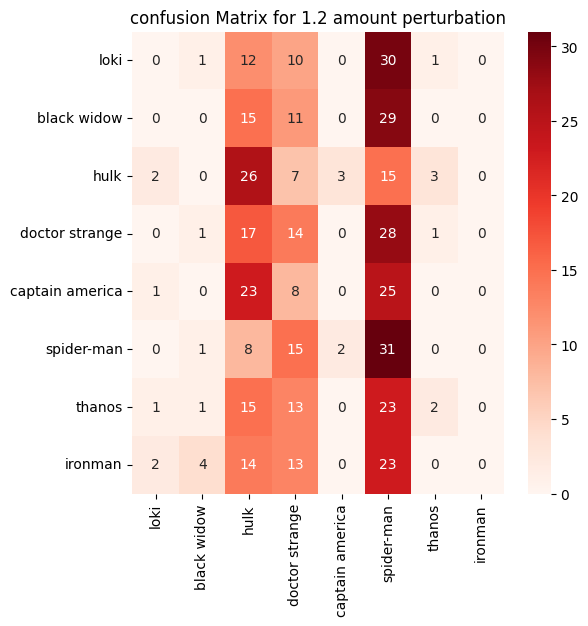

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/2914414530.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_contrast = df_contrast.append(df,ignore_index=True)


model validation accuracy for 1.25 amount perturbation is 18.18% 

                 precision    recall  f1-score   support

           loki       0.00      0.00      0.00        54
    black widow       0.10      0.02      0.03        55
           hulk       0.21      0.52      0.30        56
 doctor strange       0.18      0.26      0.21        61
captain america       0.00      0.00      0.00        57
     spider-man       0.16      0.54      0.25        57
         thanos       0.50      0.09      0.15        55
        ironman       0.00      0.00      0.00        56

       accuracy                           0.18       451
      macro avg       0.14      0.18      0.12       451
   weighted avg       0.14      0.18      0.12       451



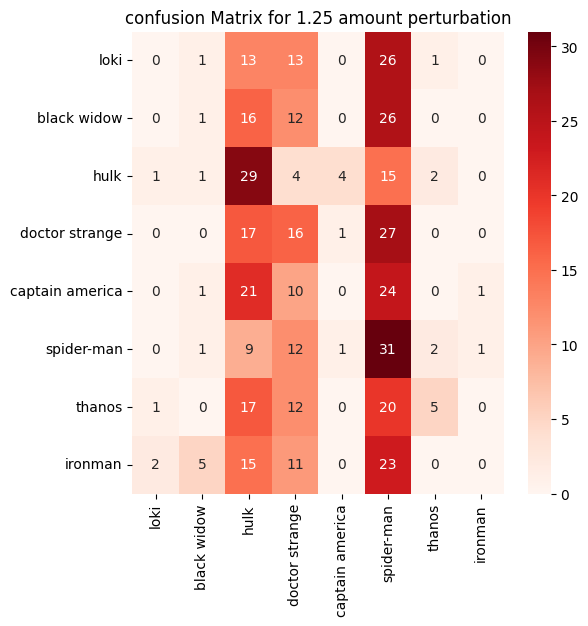

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/2914414530.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_contrast = df_contrast.append(df,ignore_index=True)


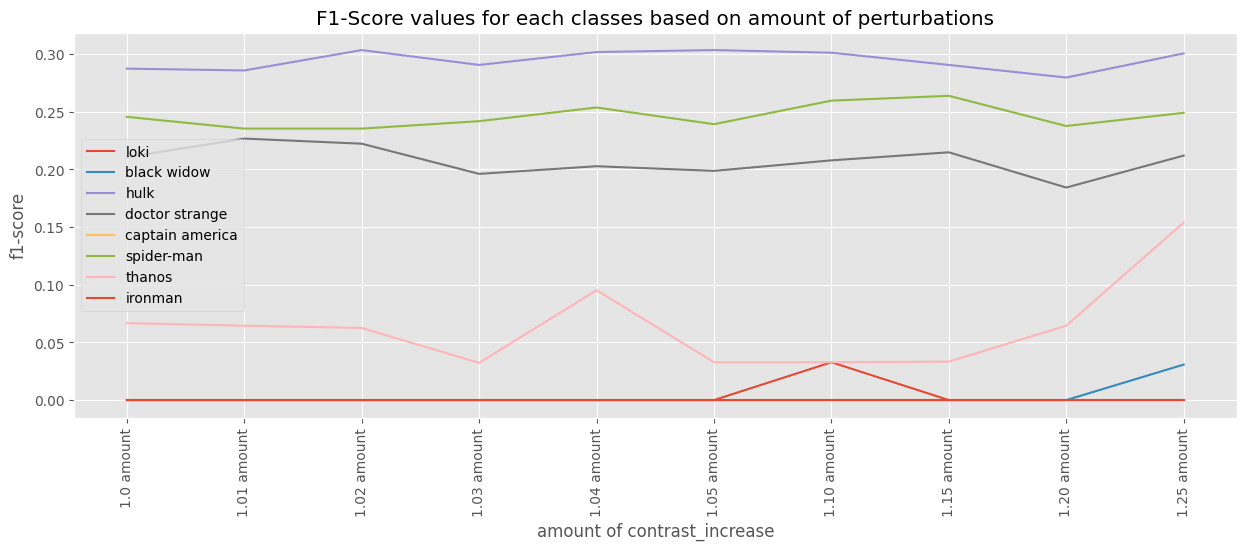

In [50]:
def contrastINC(contrast):
    model_labels=Applycontrastbright(contrast, 0)
    return classificationMetrics(true_=spY_test,prediction_=model_labels,class_labels=class_labels,amount_=contrast)

contrast = [1.0, 1.01, 1.02, 1.03, 1.04, 1.05, 1.1, 1.15, 1.20, 1.25]
df_contrast=pd.DataFrame()
for i in contrast:
    df = pd.DataFrame()
    df = pd.DataFrame(contrastINC(i))
   
    df_contrast = df_contrast.append(df,ignore_index=True)

    
df_contrast['amount of contrast_increase']=["1.0 amount","1.01 amount","1.02 amount","1.03 amount","1.04 amount","1.05 amount","1.10 amount","1.15 amount","1.20 amount","1.25 amount"]
df_contrast=df_contrast.set_index("amount of contrast_increase")
df_contrast.head(10)
    
with plt.style.context(style="ggplot"):
  lines_=df_contrast.plot.line(figsize=(15,5))
  plt.title(label="F1-Score values for each classes based on amount of perturbations")
  plt.ylabel(ylabel="f1-score")
  plt.xticks(range(0,len(df_contrast.index)), df_contrast.index)
  plt.xticks(rotation=90)
  plt.show()    


[[ 99.   5.   5. ...   0.   0.   9.]
 [  0.   0.   0. ... 118.   1.   0.]
 [  9.  21.  10. ...   0.   0.  12.]
 ...
 [  1. 103. 147. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   7.   0. ...   0.   1.   4.]]
[[ 1.  0.  0. ... 18.  0.  2.]
 [58. 34. 11. ...  0.  0.  0.]
 [ 0.  0.  4. ...  0.  5.  9.]
 ...
 [ 1.  3.  1. ...  1.  2.  9.]
 [ 9.  9.  2. ...  5.  2.  6.]
 [ 5.  5.  1. ...  9.  2.  2.]]
[[ 0.  0.  0. ...  0.  0.  0.]
 [10.  0.  0. ...  1.  0.  0.]
 [11.  0.  0. ...  0.  0.  0.]
 ...
 [36.  3.  0. ...  0.  0.  1.]
 [ 0.  0.  0. ...  5.  0.  0.]
 [ 1.  0.  0. ...  0.  0.  0.]]
[[ 4. 36. 12. ...  0.  0.  1.]
 [ 2. 34. 69. ...  1.  0.  4.]
 [27. 48. 25. ...  0.  1. 13.]
 ...
 [ 0.  3.  9. ...  2.  0.  3.]
 [ 0.  1. 44. ...  0.  0. 17.]
 [ 0.  0. 12. ... 16.  0.  1.]]
[[ 0.  0.  0. ...  0.  0.  1.]
 [ 0. 14.  8. ...  3.  2.  2.]
 [ 3.  1.  0. ...  2.  0.  0.]
 ...
 [ 2.  2.  0. ...  0.  1. 23.]
 [ 7.  3.  6. ... 12.  0. 18.]
 [ 1.  0.  0. ...  2.  0.  0.]]
[[ 6

[[105.  10.   0. ...   0.   0.   1.]
 [ 59.  14.   0. ...   4.   0.   1.]
 [ 44.  17.   5. ...   2.   0.   4.]
 ...
 [  0.   1.   2. ...   0.   0.   0.]
 [  0.   5.  11. ...  94.  18.   0.]
 [  1.   0.   0. ...   0.   2.   0.]]
[[38. 82. 74. ...  0.  1.  4.]
 [ 2.  1.  0. ... 21.  4. 17.]
 [ 2.  0.  0. ...  5.  6. 64.]
 ...
 [30. 14.  4. ... 12. 34. 41.]
 [17.  3.  3. ... 50. 35. 26.]
 [ 0.  0.  0. ... 17.  2.  1.]]
[[63. 26.  9. ...  8. 35. 11.]
 [19. 13. 26. ...  3. 15. 82.]
 [15. 17.  7. ... 13.  9.  3.]
 ...
 [10.  0.  0. ... 48.  9.  5.]
 [ 9. 20.  1. ...  0.  0.  0.]
 [12.  0.  0. ... 42.  3.  2.]]
[[  1.   0.  22. ...   0.   0.   0.]
 [  6.   6.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   8.   1.   3.]
 ...
 [ 64. 107.  48. ...   3.  17.  14.]
 [ 31.  45.   6. ...  22.   6.   1.]
 [ 27.   2.   0. ...   5.   0.  14.]]
[[ 0.  0.  0. ...  2.  1.  0.]
 [26.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [18.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  1.]


[[ 38.  15.   1. ...  10.   5.  27.]
 [  6.  11.  25. ...   0.   0.   0.]
 [  0.   2.  16. ...  14.   1.   1.]
 ...
 [ 78.  83.  26. ...   0.   0.   1.]
 [  0.   0.   0. ...   5.  12.   5.]
 [ 15. 109.  52. ...   1.   3.   2.]]
[[ 3.  1.  8. ... 22. 47. 27.]
 [26.  0.  0. ...  2.  3. 14.]
 [17.  6.  1. ... 80. 25. 10.]
 ...
 [18.  0.  0. ...  9.  4. 42.]
 [ 0.  0.  0. ... 74. 22.  7.]
 [ 0.  6.  1. ...  0.  0.  0.]]
[[ 54.   0.   0. ... 131.  16.   4.]
 [ 88.   2.   0. ...  83.  21.  11.]
 [123.   0.   0. ...   1.   0.  11.]
 ...
 [ 83.  57.   0. ...   1.   1.   0.]
 [  0.   0.   0. ...   2.   1.   0.]
 [156.  76.   3. ...   4.   0.   4.]]
[[  0.   0.   0. ...   0.   0.   0.]
 [134.  41.   1. ...   0.   0.   2.]
 [  0.   2.  14. ...   1.   0.   4.]
 ...
 [ 86.  15.   2. ...   0.   0.   2.]
 [116.  11.   1. ...   0.   0.   1.]
 [ 23.   3.   0. ...   0.   0.   2.]]
[[  5.   4.  11. ...  25.  54.  32.]
 [ 11.  63.  92. ...   0.   0.   0.]
 [  4.   6.   7. ...  24.   0.   0.]
 ...
 [ 91.  

TypeError: 'NoneType' object is not iterable

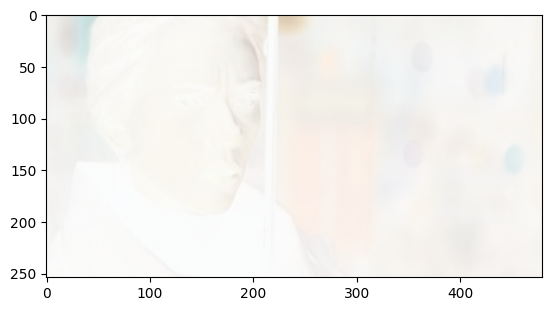

In [69]:
model_labels=Applycontrastbright(0.3, 0)
df1 = classificationMetrics(true_=spY_test,prediction_=model_labels,class_labels=class_labels,amount_=0.3)

model validation accuracy for 1.0 amount perturbation is 17.29% 

                 precision    recall  f1-score   support

           loki       0.00      0.00      0.00        54
    black widow       0.00      0.00      0.00        55
           hulk       0.21      0.46      0.29        56
 doctor strange       0.18      0.26      0.21        61
captain america       0.00      0.00      0.00        57
     spider-man       0.15      0.60      0.25        57
         thanos       0.40      0.04      0.07        55
        ironman       0.00      0.00      0.00        56

       accuracy                           0.17       451
      macro avg       0.12      0.17      0.10       451
   weighted avg       0.12      0.17      0.10       451



/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaa

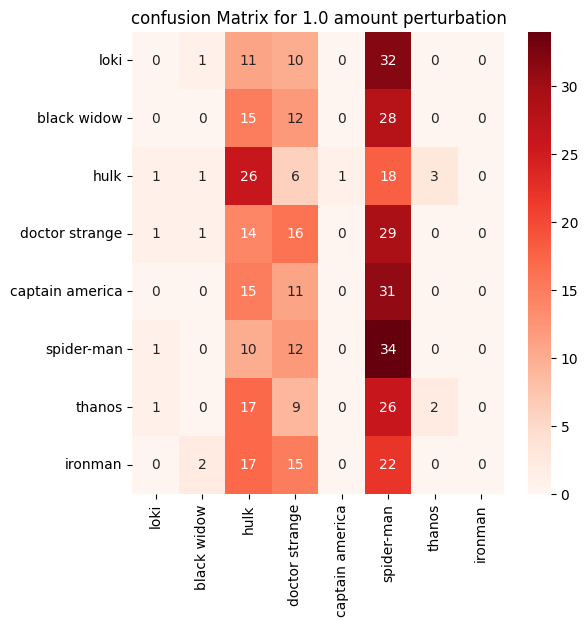

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/3777889654.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_contrast_dec = df_contrast_dec.append(df,ignore_index=True)


model validation accuracy for 0.95 amount perturbation is 16.63% 

                 precision    recall  f1-score   support

           loki       0.00      0.00      0.00        54
    black widow       0.00      0.00      0.00        55
           hulk       0.19      0.43      0.27        56
 doctor strange       0.15      0.23      0.18        61
captain america       0.00      0.00      0.00        57
     spider-man       0.16      0.61      0.26        57
         thanos       0.33      0.04      0.07        55
        ironman       0.00      0.00      0.00        56

       accuracy                           0.17       451
      macro avg       0.10      0.16      0.10       451
   weighted avg       0.11      0.17      0.10       451



/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaa

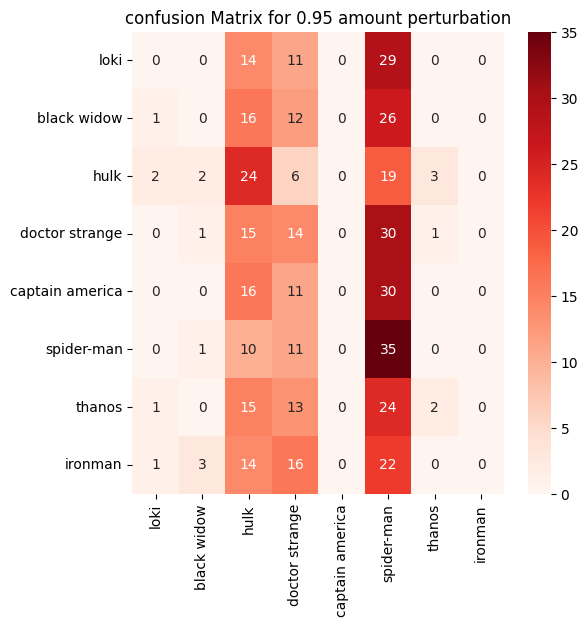

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/3777889654.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_contrast_dec = df_contrast_dec.append(df,ignore_index=True)


model validation accuracy for 0.9 amount perturbation is 16.63% 

                 precision    recall  f1-score   support

           loki       0.00      0.00      0.00        54
    black widow       0.00      0.00      0.00        55
           hulk       0.21      0.48      0.29        56
 doctor strange       0.17      0.25      0.20        61
captain america       0.00      0.00      0.00        57
     spider-man       0.15      0.56      0.24        57
         thanos       0.14      0.02      0.03        55
        ironman       0.00      0.00      0.00        56

       accuracy                           0.17       451
      macro avg       0.08      0.16      0.10       451
   weighted avg       0.09      0.17      0.10       451



/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaa

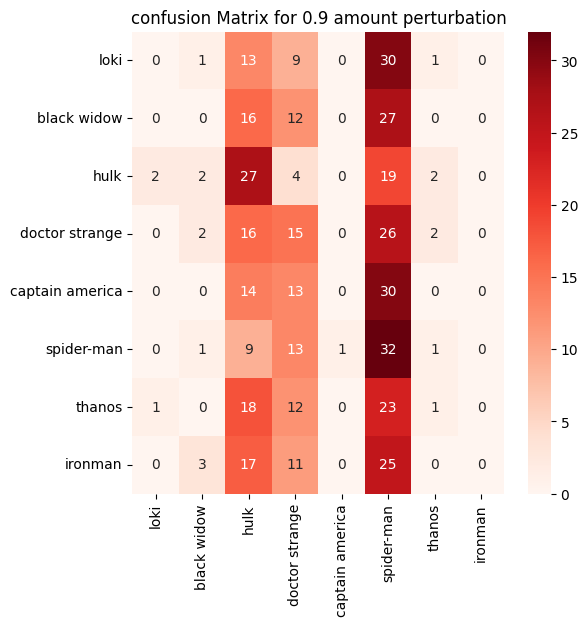

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/3777889654.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_contrast_dec = df_contrast_dec.append(df,ignore_index=True)


model validation accuracy for 0.85 amount perturbation is 16.41% 

                 precision    recall  f1-score   support

           loki       0.00      0.00      0.00        54
    black widow       0.00      0.00      0.00        55
           hulk       0.20      0.45      0.28        56
 doctor strange       0.15      0.23      0.18        61
captain america       0.00      0.00      0.00        57
     spider-man       0.16      0.60      0.25        57
         thanos       0.20      0.02      0.03        55
        ironman       0.00      0.00      0.00        56

       accuracy                           0.16       451
      macro avg       0.09      0.16      0.09       451
   weighted avg       0.09      0.16      0.09       451



/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaa

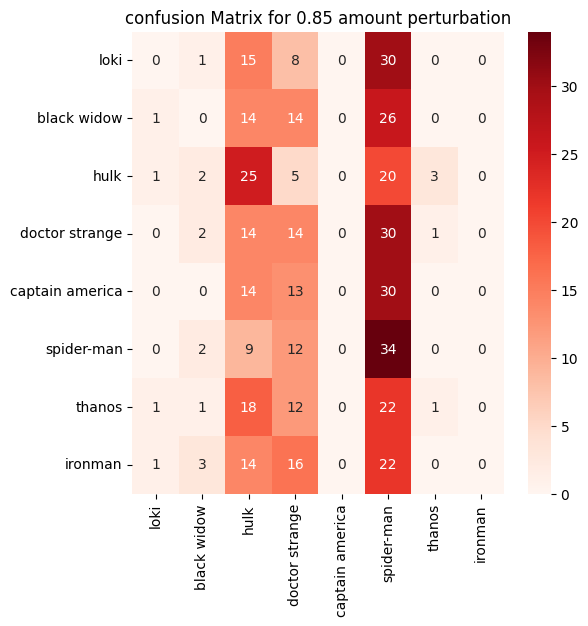

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/3777889654.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_contrast_dec = df_contrast_dec.append(df,ignore_index=True)
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/skle

model validation accuracy for 0.8 amount perturbation is 16.41% 

                 precision    recall  f1-score   support

           loki       0.00      0.00      0.00        54
    black widow       0.00      0.00      0.00        55
           hulk       0.19      0.41      0.26        56
 doctor strange       0.17      0.26      0.20        61
captain america       0.00      0.00      0.00        57
     spider-man       0.16      0.60      0.25        57
         thanos       0.14      0.02      0.03        55
        ironman       0.00      0.00      0.00        56

       accuracy                           0.16       451
      macro avg       0.08      0.16      0.09       451
   weighted avg       0.08      0.16      0.10       451



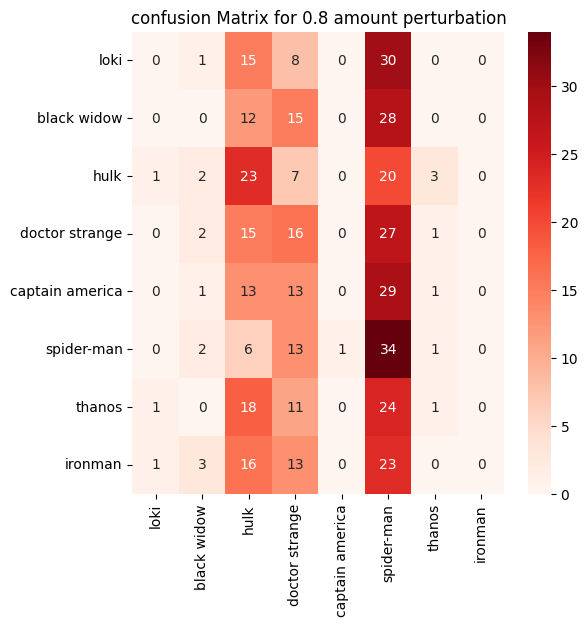

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/3777889654.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_contrast_dec = df_contrast_dec.append(df,ignore_index=True)


model validation accuracy for 0.6 amount perturbation is 15.08% 

                 precision    recall  f1-score   support

           loki       0.12      0.02      0.03        54
    black widow       0.00      0.00      0.00        55
           hulk       0.17      0.32      0.22        56
 doctor strange       0.16      0.23      0.19        61
captain america       0.00      0.00      0.00        57
     spider-man       0.14      0.60      0.23        57
         thanos       0.25      0.02      0.03        55
        ironman       0.00      0.00      0.00        56

       accuracy                           0.15       451
      macro avg       0.11      0.15      0.09       451
   weighted avg       0.11      0.15      0.09       451



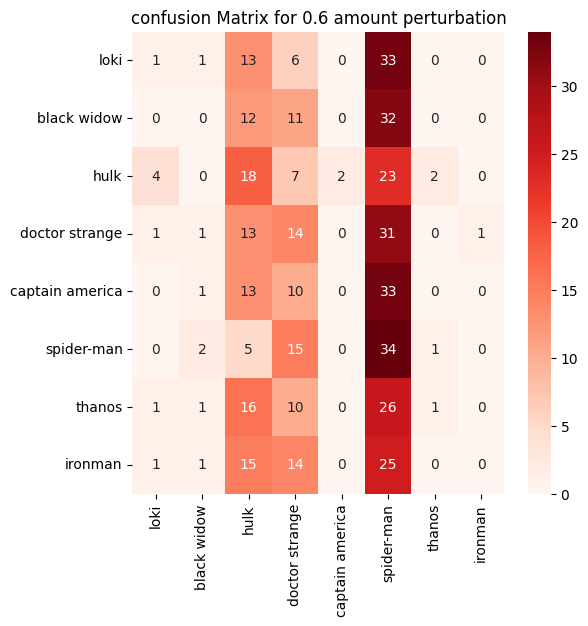

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/3777889654.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_contrast_dec = df_contrast_dec.append(df,ignore_index=True)


model validation accuracy for 0.4 amount perturbation is 14.63% 

                 precision    recall  f1-score   support

           loki       0.17      0.04      0.06        54
    black widow       0.25      0.02      0.03        55
           hulk       0.14      0.20      0.16        56
 doctor strange       0.15      0.18      0.16        61
captain america       0.00      0.00      0.00        57
     spider-man       0.15      0.72      0.24        57
         thanos       0.00      0.00      0.00        55
        ironman       0.00      0.00      0.00        56

       accuracy                           0.15       451
      macro avg       0.11      0.14      0.08       451
   weighted avg       0.11      0.15      0.08       451



/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaa

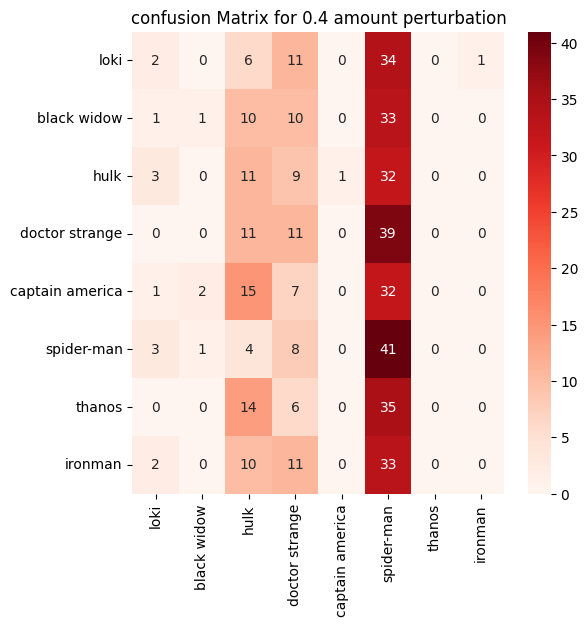

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/3777889654.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_contrast_dec = df_contrast_dec.append(df,ignore_index=True)


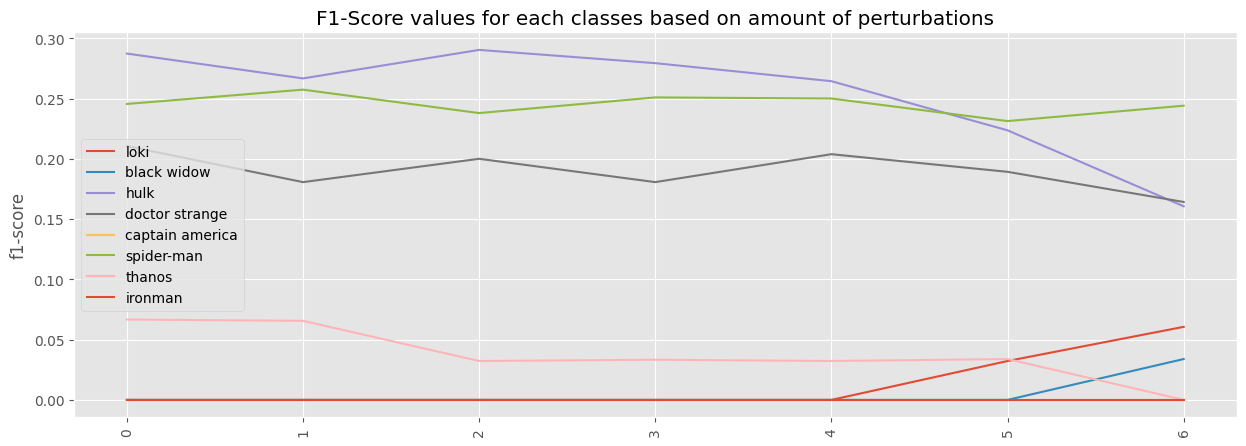

In [72]:
def contrastDec(contrast):
    model_labels=Applycontrastbright(contrast, 0)
    return classificationMetrics(true_=spY_test,prediction_=model_labels,class_labels=class_labels,amount_=contrast)

contrast = [1.0, 0.95, 0.90, 0.85, 0.80, 0.60, 0.40]
df_contrast_dec=pd.DataFrame()
for i in contrast:
    df = pd.DataFrame()
    df = pd.DataFrame(contrastDec(i))
    df_contrast_dec = df_contrast_dec.append(df,ignore_index=True)

    
df_contrast_dec['amount of contrast_decrease']=["1.0 amount","0.95 amount","0.90 amount","0.85 amount","0.80 amount","0.60 amount","0.40 amount"]
df_contras_dect=df_contrast_dec.set_index("amount of contrast_decrease")
df_contrast_dec.head(10)
    
with plt.style.context(style="ggplot"):
  lines_=df_contrast_dec.plot.line(figsize=(15,5))
  plt.title(label="F1-Score values for each classes based on amount of perturbations")
  plt.ylabel(ylabel="f1-score")
  plt.xticks(range(0,len(df_contrast_dec.index)), df_contrast_dec.index)
  plt.xticks(rotation=90)
  plt.show()   

model validation accuracy for 0 amount perturbation is 17.29% 

                 precision    recall  f1-score   support

           loki       0.00      0.00      0.00        54
    black widow       0.00      0.00      0.00        55
           hulk       0.21      0.46      0.29        56
 doctor strange       0.18      0.26      0.21        61
captain america       0.00      0.00      0.00        57
     spider-man       0.15      0.60      0.25        57
         thanos       0.40      0.04      0.07        55
        ironman       0.00      0.00      0.00        56

       accuracy                           0.17       451
      macro avg       0.12      0.17      0.10       451
   weighted avg       0.12      0.17      0.10       451



/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaa

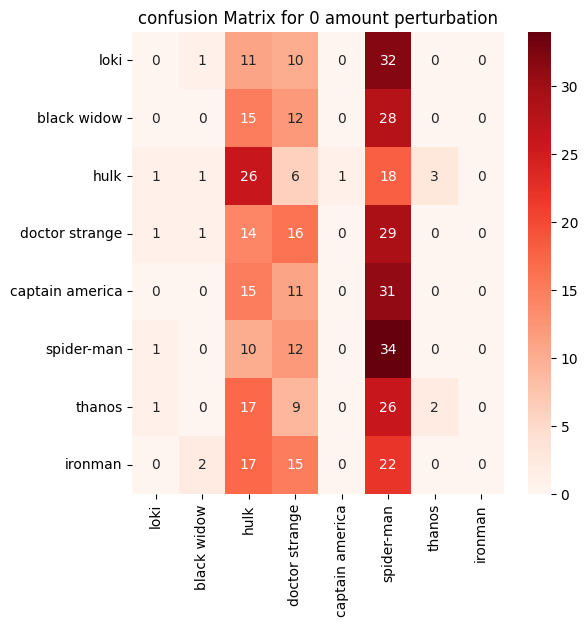

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/3969668554.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_bright_inc = df_bright_inc.append(df,ignore_index=True)


model validation accuracy for 5 amount perturbation is 15.30% 

                 precision    recall  f1-score   support

           loki       0.00      0.00      0.00        54
    black widow       0.00      0.00      0.00        55
           hulk       0.22      0.32      0.26        56
 doctor strange       0.18      0.18      0.18        61
captain america       0.00      0.00      0.00        57
     spider-man       0.13      0.65      0.22        57
         thanos       0.38      0.05      0.10        55
        ironman       0.00      0.00      0.00        56

       accuracy                           0.15       451
      macro avg       0.11      0.15      0.09       451
   weighted avg       0.11      0.15      0.10       451



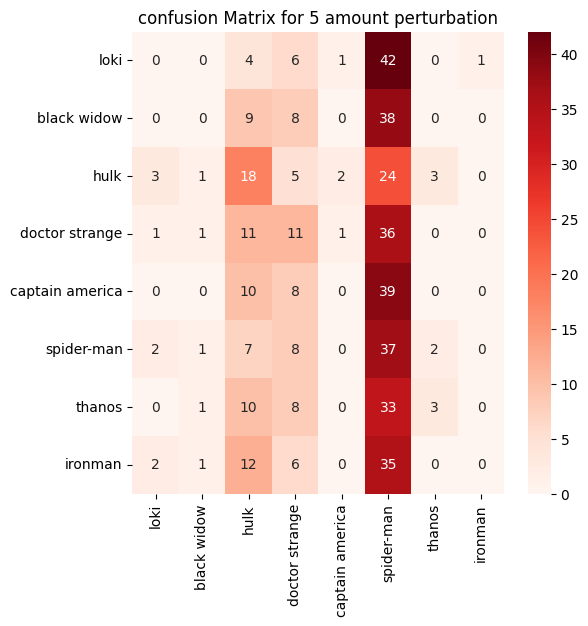

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/3969668554.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_bright_inc = df_bright_inc.append(df,ignore_index=True)


model validation accuracy for 10 amount perturbation is 15.08% 

                 precision    recall  f1-score   support

           loki       0.00      0.00      0.00        54
    black widow       0.00      0.00      0.00        55
           hulk       0.23      0.34      0.28        56
 doctor strange       0.16      0.16      0.16        61
captain america       0.00      0.00      0.00        57
     spider-man       0.13      0.65      0.22        57
         thanos       0.25      0.04      0.06        55
        ironman       0.00      0.00      0.00        56

       accuracy                           0.15       451
      macro avg       0.10      0.15      0.09       451
   weighted avg       0.10      0.15      0.09       451



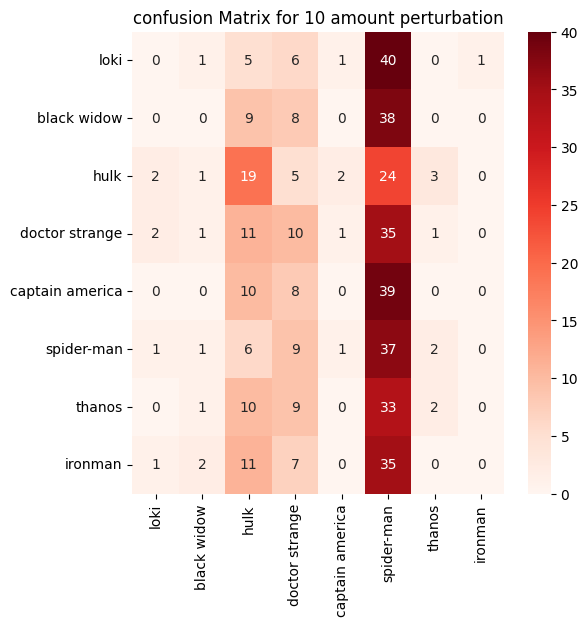

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/3969668554.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_bright_inc = df_bright_inc.append(df,ignore_index=True)


model validation accuracy for 15 amount perturbation is 14.86% 

                 precision    recall  f1-score   support

           loki       0.00      0.00      0.00        54
    black widow       0.00      0.00      0.00        55
           hulk       0.24      0.36      0.28        56
 doctor strange       0.14      0.13      0.13        61
captain america       0.00      0.00      0.00        57
     spider-man       0.13      0.65      0.22        57
         thanos       0.22      0.04      0.06        55
        ironman       0.00      0.00      0.00        56

       accuracy                           0.15       451
      macro avg       0.09      0.15      0.09       451
   weighted avg       0.09      0.15      0.09       451



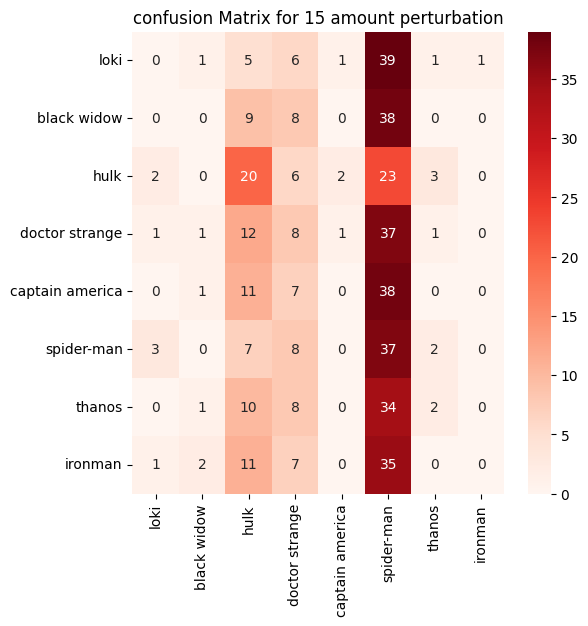

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/3969668554.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_bright_inc = df_bright_inc.append(df,ignore_index=True)


model validation accuracy for 20 amount perturbation is 14.86% 

                 precision    recall  f1-score   support

           loki       0.00      0.00      0.00        54
    black widow       0.00      0.00      0.00        55
           hulk       0.24      0.36      0.28        56
 doctor strange       0.14      0.15      0.14        61
captain america       0.00      0.00      0.00        57
     spider-man       0.13      0.63      0.22        57
         thanos       0.25      0.04      0.06        55
        ironman       0.00      0.00      0.00        56

       accuracy                           0.15       451
      macro avg       0.09      0.15      0.09       451
   weighted avg       0.10      0.15      0.09       451



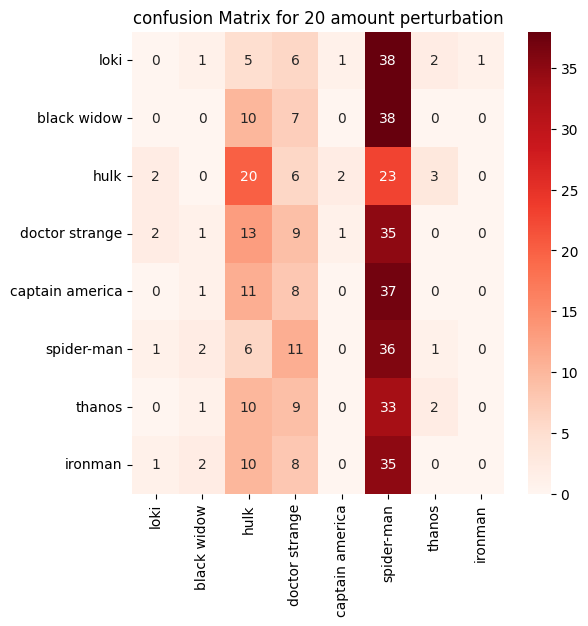

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/3969668554.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_bright_inc = df_bright_inc.append(df,ignore_index=True)


model validation accuracy for 25 amount perturbation is 15.30% 

                 precision    recall  f1-score   support

           loki       0.12      0.02      0.03        54
    black widow       0.00      0.00      0.00        55
           hulk       0.23      0.34      0.28        56
 doctor strange       0.15      0.16      0.16        61
captain america       0.00      0.00      0.00        57
     spider-man       0.13      0.65      0.22        57
         thanos       0.22      0.04      0.06        55
        ironman       0.00      0.00      0.00        56

       accuracy                           0.15       451
      macro avg       0.11      0.15      0.09       451
   weighted avg       0.11      0.15      0.10       451



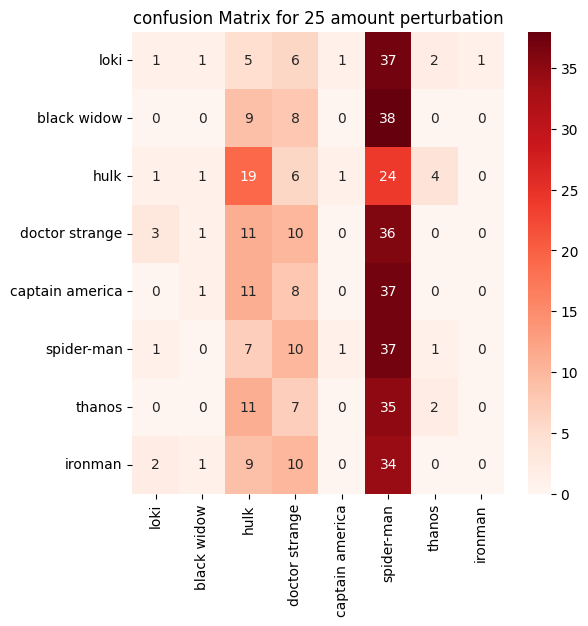

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/3969668554.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_bright_inc = df_bright_inc.append(df,ignore_index=True)


model validation accuracy for 30 amount perturbation is 15.74% 

                 precision    recall  f1-score   support

           loki       0.14      0.02      0.03        54
    black widow       0.00      0.00      0.00        55
           hulk       0.22      0.34      0.27        56
 doctor strange       0.16      0.16      0.16        61
captain america       0.00      0.00      0.00        57
     spider-man       0.14      0.67      0.23        57
         thanos       0.23      0.05      0.09        55
        ironman       0.00      0.00      0.00        56

       accuracy                           0.16       451
      macro avg       0.11      0.16      0.10       451
   weighted avg       0.11      0.16      0.10       451



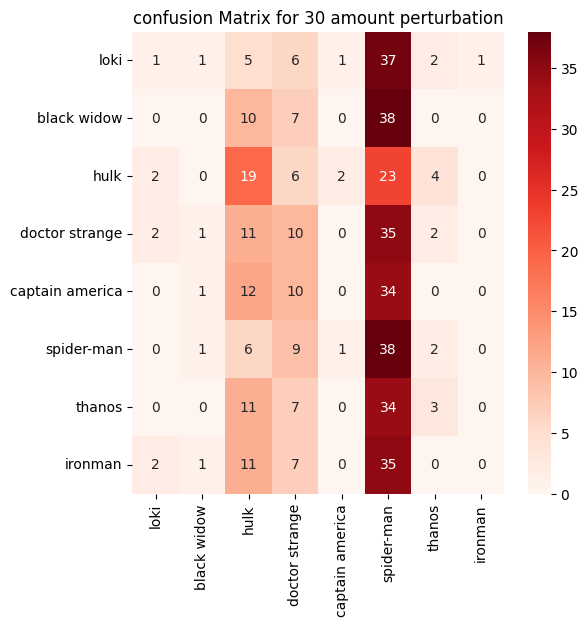

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/3969668554.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_bright_inc = df_bright_inc.append(df,ignore_index=True)


model validation accuracy for 35 amount perturbation is 15.30% 

                 precision    recall  f1-score   support

           loki       0.00      0.00      0.00        54
    black widow       0.00      0.00      0.00        55
           hulk       0.20      0.32      0.25        56
 doctor strange       0.17      0.16      0.17        61
captain america       0.00      0.00      0.00        57
     spider-man       0.14      0.68      0.24        57
         thanos       0.18      0.04      0.06        55
        ironman       0.00      0.00      0.00        56

       accuracy                           0.15       451
      macro avg       0.09      0.15      0.09       451
   weighted avg       0.09      0.15      0.09       451



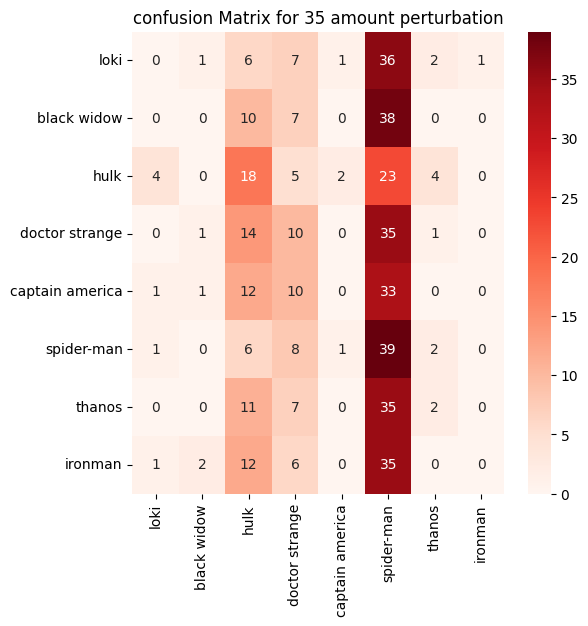

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/3969668554.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_bright_inc = df_bright_inc.append(df,ignore_index=True)


model validation accuracy for 40 amount perturbation is 14.19% 

                 precision    recall  f1-score   support

           loki       0.00      0.00      0.00        54
    black widow       0.00      0.00      0.00        55
           hulk       0.21      0.34      0.26        56
 doctor strange       0.12      0.13      0.13        61
captain america       0.00      0.00      0.00        57
     spider-man       0.13      0.60      0.21        57
         thanos       0.30      0.05      0.09        55
        ironman       0.00      0.00      0.00        56

       accuracy                           0.14       451
      macro avg       0.09      0.14      0.09       451
   weighted avg       0.10      0.14      0.09       451



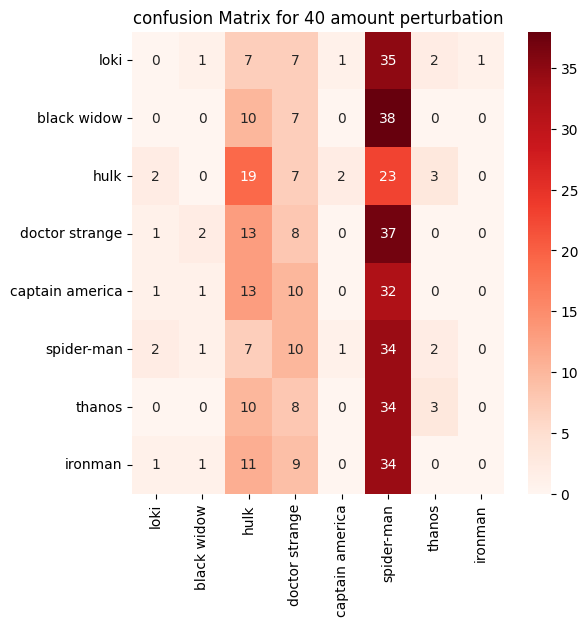

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/3969668554.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_bright_inc = df_bright_inc.append(df,ignore_index=True)


model validation accuracy for 45 amount perturbation is 14.63% 

                 precision    recall  f1-score   support

           loki       0.00      0.00      0.00        54
    black widow       0.00      0.00      0.00        55
           hulk       0.21      0.34      0.26        56
 doctor strange       0.15      0.18      0.17        61
captain america       0.00      0.00      0.00        57
     spider-man       0.13      0.60      0.21        57
         thanos       0.29      0.04      0.06        55
        ironman       0.00      0.00      0.00        56

       accuracy                           0.15       451
      macro avg       0.10      0.14      0.09       451
   weighted avg       0.10      0.15      0.09       451



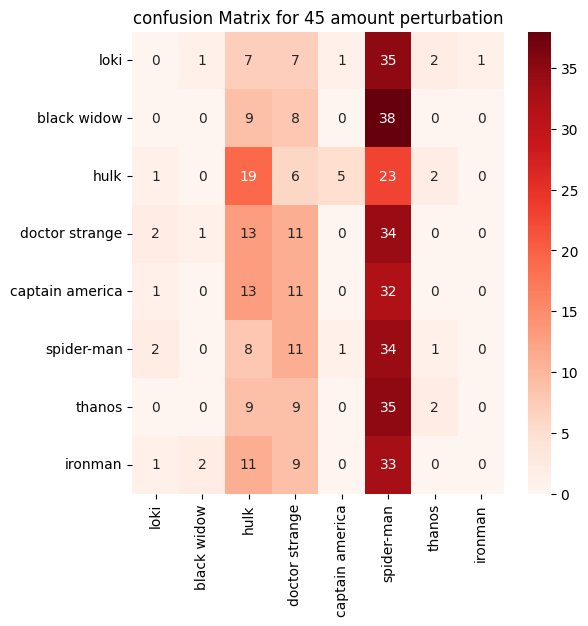

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/3969668554.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_bright_inc = df_bright_inc.append(df,ignore_index=True)


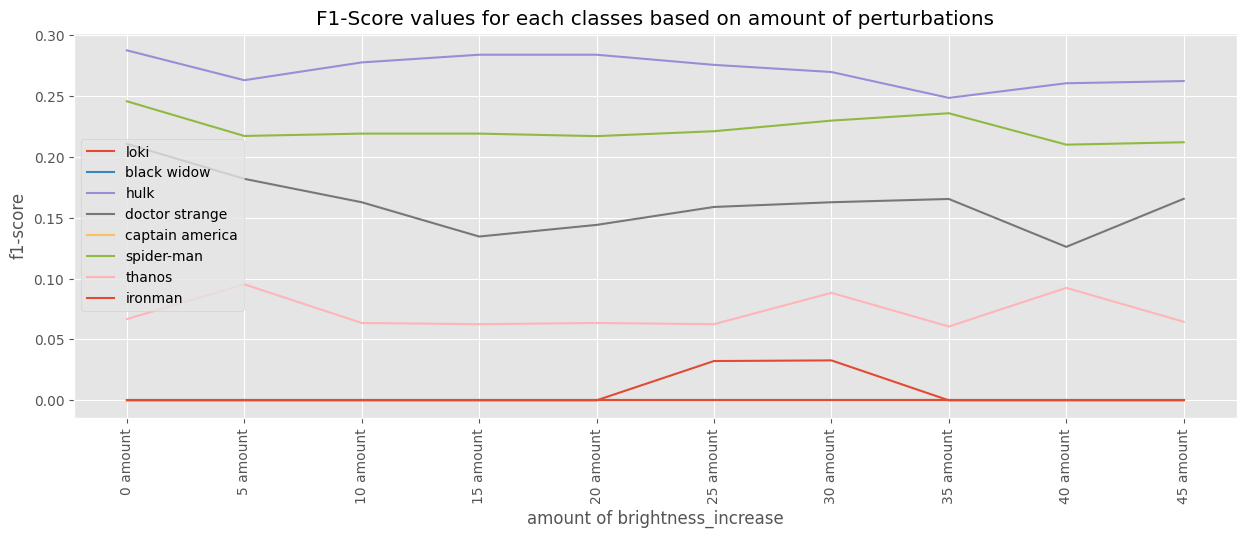

In [73]:
#brightness increase
def brightINC(bright):
    model_labels=Applycontrastbright(1, bright)
    return classificationMetrics(true_=spY_test,prediction_=model_labels,class_labels=class_labels,amount_=bright)


inc_bright = 5
start_bright = 0

df_bright_inc = pd.DataFrame()
while start_bright <= 45:
    df = pd.DataFrame()
    df = pd.DataFrame(brightINC(start_bright))
    start_bright += inc_bright
    df_bright_inc = df_bright_inc.append(df,ignore_index=True)
    
#updating the Table
df_bright_inc['amount of brightness_increase']=["0 amount","5 amount","10 amount","15 amount","20 amount","25 amount","30 amount","35 amount","40 amount","45 amount"]
df_bright_inc=df_bright_inc.set_index("amount of brightness_increase")

with plt.style.context(style="ggplot"):
  lines_=df_bright_inc.plot.line(figsize=(15,5))
  plt.title(label="F1-Score values for each classes based on amount of perturbations")
  plt.ylabel(ylabel="f1-score")
  plt.xticks(range(0,len(df_bright_inc.index)), df_bright_inc.index)
  plt.xticks(rotation=90)
  plt.show()

model validation accuracy for 0 amount perturbation is 17.29% 

                 precision    recall  f1-score   support

           loki       0.00      0.00      0.00        54
    black widow       0.00      0.00      0.00        55
           hulk       0.21      0.46      0.29        56
 doctor strange       0.18      0.26      0.21        61
captain america       0.00      0.00      0.00        57
     spider-man       0.15      0.60      0.25        57
         thanos       0.40      0.04      0.07        55
        ironman       0.00      0.00      0.00        56

       accuracy                           0.17       451
      macro avg       0.12      0.17      0.10       451
   weighted avg       0.12      0.17      0.10       451



/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaa

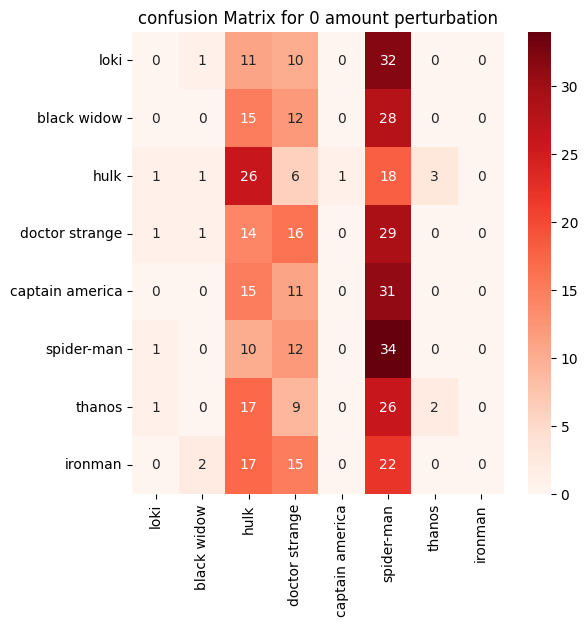

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/1750816916.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_bright_dec = df_bright_dec.append(df,ignore_index=True)


model validation accuracy for 5 amount perturbation is 15.08% 

                 precision    recall  f1-score   support

           loki       0.17      0.02      0.03        54
    black widow       0.00      0.00      0.00        55
           hulk       0.16      0.36      0.22        56
 doctor strange       0.17      0.31      0.22        61
captain america       0.00      0.00      0.00        57
     spider-man       0.14      0.47      0.22        57
         thanos       0.14      0.02      0.03        55
        ironman       0.00      0.00      0.00        56

       accuracy                           0.15       451
      macro avg       0.10      0.15      0.09       451
   weighted avg       0.10      0.15      0.09       451



/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaa

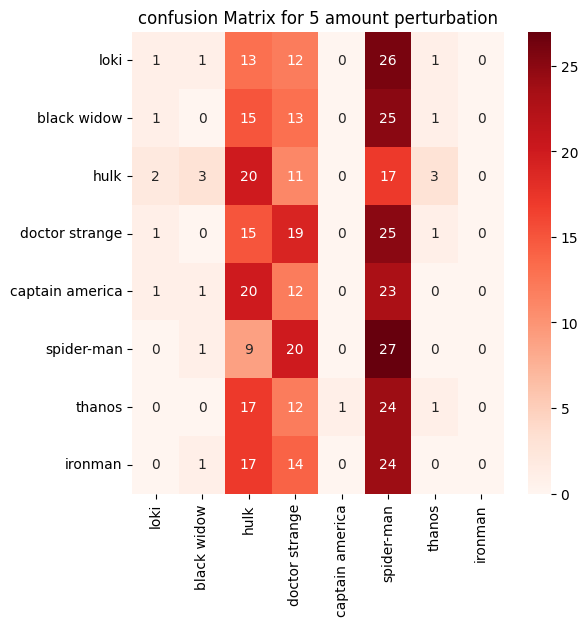

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/1750816916.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_bright_dec = df_bright_dec.append(df,ignore_index=True)


model validation accuracy for 10 amount perturbation is 16.85% 

                 precision    recall  f1-score   support

           loki       0.50      0.04      0.07        54
    black widow       0.00      0.00      0.00        55
           hulk       0.19      0.45      0.27        56
 doctor strange       0.15      0.31      0.20        61
captain america       0.50      0.02      0.03        57
     spider-man       0.15      0.46      0.22        57
         thanos       0.38      0.05      0.10        55
        ironman       0.00      0.00      0.00        56

       accuracy                           0.17       451
      macro avg       0.23      0.17      0.11       451
   weighted avg       0.23      0.17      0.11       451



/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaa

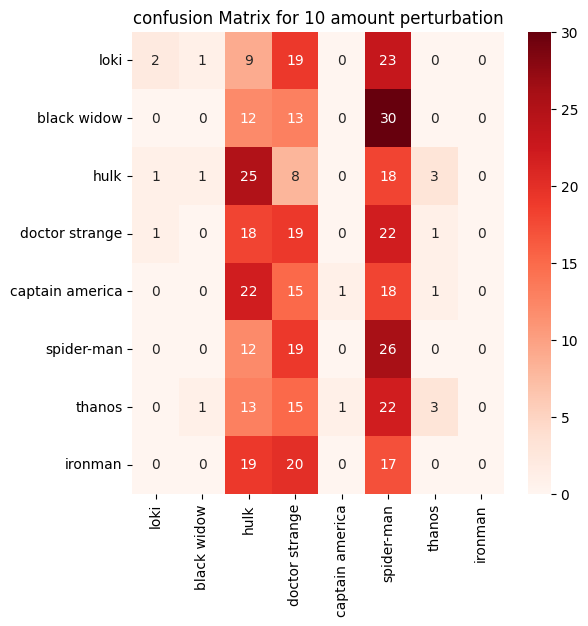

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/1750816916.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_bright_dec = df_bright_dec.append(df,ignore_index=True)


model validation accuracy for 15 amount perturbation is 15.52% 

                 precision    recall  f1-score   support

           loki       0.17      0.02      0.03        54
    black widow       0.00      0.00      0.00        55
           hulk       0.18      0.45      0.26        56
 doctor strange       0.14      0.31      0.19        61
captain america       1.00      0.02      0.03        57
     spider-man       0.14      0.37      0.20        57
         thanos       0.23      0.05      0.09        55
        ironman       0.00      0.00      0.00        56

       accuracy                           0.16       451
      macro avg       0.23      0.15      0.10       451
   weighted avg       0.23      0.16      0.10       451



/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaa

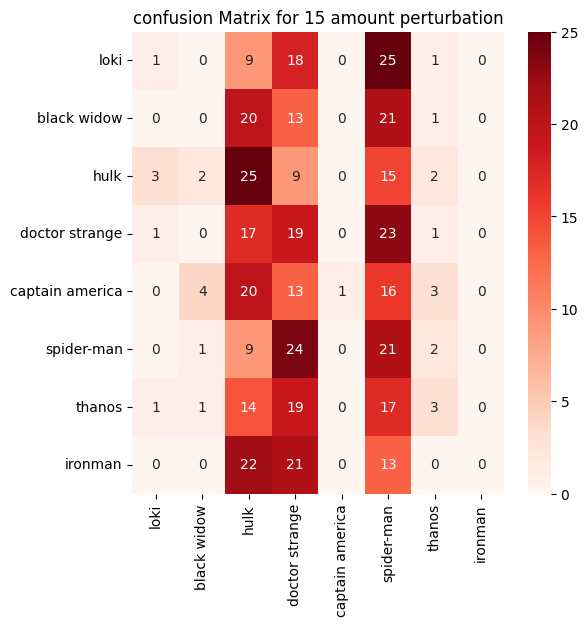

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/1750816916.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_bright_dec = df_bright_dec.append(df,ignore_index=True)


model validation accuracy for 20 amount perturbation is 16.41% 

                 precision    recall  f1-score   support

           loki       0.67      0.04      0.07        54
    black widow       0.22      0.04      0.06        55
           hulk       0.18      0.46      0.26        56
 doctor strange       0.16      0.43      0.24        61
captain america       0.67      0.04      0.07        57
     spider-man       0.13      0.28      0.18        57
         thanos       0.00      0.00      0.00        55
        ironman       0.00      0.00      0.00        56

       accuracy                           0.16       451
      macro avg       0.25      0.16      0.11       451
   weighted avg       0.25      0.16      0.11       451



/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaa

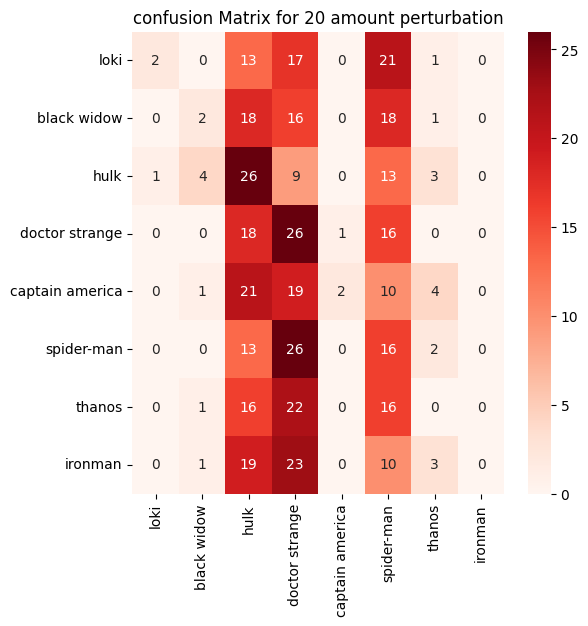

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/1750816916.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_bright_dec = df_bright_dec.append(df,ignore_index=True)


model validation accuracy for 25 amount perturbation is 17.07% 

                 precision    recall  f1-score   support

           loki       0.33      0.04      0.07        54
    black widow       0.08      0.02      0.03        55
           hulk       0.19      0.50      0.28        56
 doctor strange       0.14      0.39      0.21        61
captain america       0.50      0.02      0.03        57
     spider-man       0.17      0.32      0.22        57
         thanos       0.20      0.05      0.09        55
        ironman       0.00      0.00      0.00        56

       accuracy                           0.17       451
      macro avg       0.20      0.17      0.12       451
   weighted avg       0.20      0.17      0.12       451



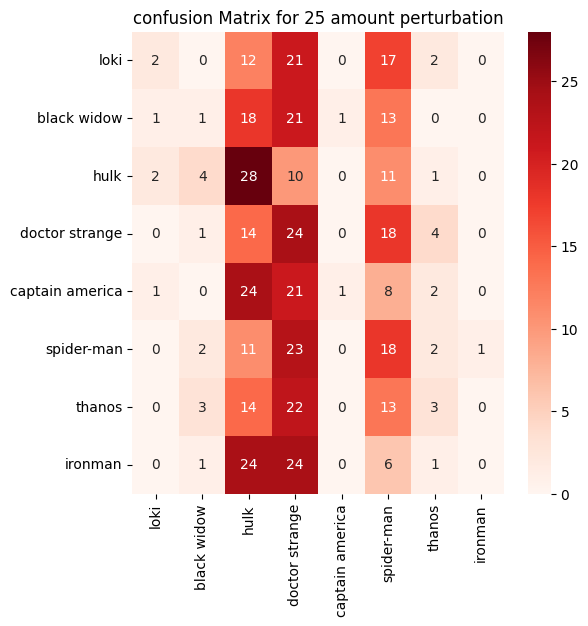

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/1750816916.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_bright_dec = df_bright_dec.append(df,ignore_index=True)


model validation accuracy for 30 amount perturbation is 16.85% 

                 precision    recall  f1-score   support

           loki       0.00      0.00      0.00        54
    black widow       0.08      0.02      0.03        55
           hulk       0.19      0.46      0.27        56
 doctor strange       0.15      0.49      0.23        61
captain america       0.50      0.04      0.07        57
     spider-man       0.18      0.25      0.21        57
         thanos       0.17      0.05      0.08        55
        ironman       0.00      0.00      0.00        56

       accuracy                           0.17       451
      macro avg       0.16      0.16      0.11       451
   weighted avg       0.16      0.17      0.11       451



/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaa

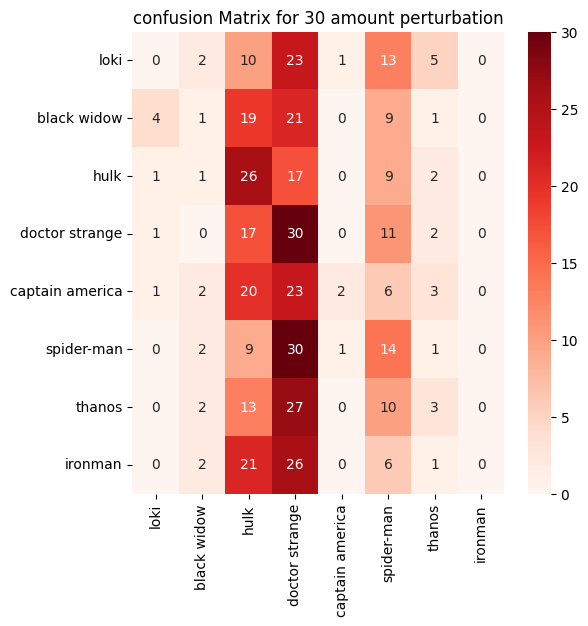

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/1750816916.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_bright_dec = df_bright_dec.append(df,ignore_index=True)
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/

model validation accuracy for 35 amount perturbation is 17.96% 

                 precision    recall  f1-score   support

           loki       0.17      0.02      0.03        54
    black widow       0.50      0.07      0.13        55
           hulk       0.20      0.45      0.28        56
 doctor strange       0.14      0.49      0.22        61
captain america       0.33      0.02      0.03        57
     spider-man       0.19      0.26      0.22        57
         thanos       0.25      0.09      0.13        55
        ironman       0.00      0.00      0.00        56

       accuracy                           0.18       451
      macro avg       0.22      0.18      0.13       451
   weighted avg       0.22      0.18      0.13       451



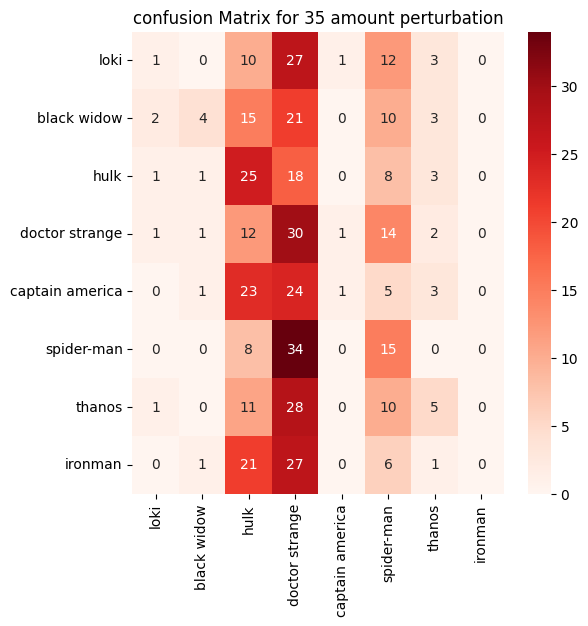

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/1750816916.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_bright_dec = df_bright_dec.append(df,ignore_index=True)


model validation accuracy for 40 amount perturbation is 17.96% 

                 precision    recall  f1-score   support

           loki       0.20      0.04      0.06        54
    black widow       0.25      0.07      0.11        55
           hulk       0.20      0.45      0.27        56
 doctor strange       0.14      0.46      0.22        61
captain america       0.25      0.02      0.03        57
     spider-man       0.24      0.30      0.27        57
         thanos       0.19      0.07      0.11        55
        ironman       0.00      0.00      0.00        56

       accuracy                           0.18       451
      macro avg       0.18      0.18      0.13       451
   weighted avg       0.18      0.18      0.13       451



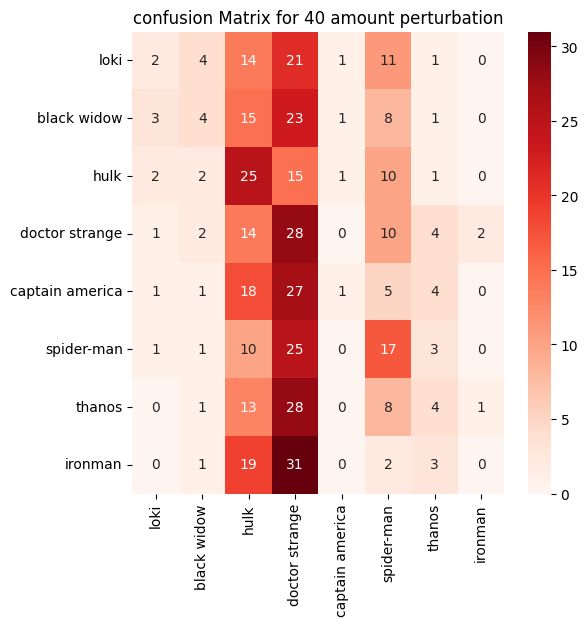

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/1750816916.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_bright_dec = df_bright_dec.append(df,ignore_index=True)


model validation accuracy for 45 amount perturbation is 18.63% 

                 precision    recall  f1-score   support

           loki       0.25      0.04      0.06        54
    black widow       0.44      0.07      0.12        55
           hulk       0.19      0.38      0.25        56
 doctor strange       0.15      0.52      0.23        61
captain america       0.50      0.04      0.07        57
     spider-man       0.24      0.33      0.28        57
         thanos       0.21      0.07      0.11        55
        ironman       0.00      0.00      0.00        56

       accuracy                           0.19       451
      macro avg       0.25      0.18      0.14       451
   weighted avg       0.25      0.19      0.14       451



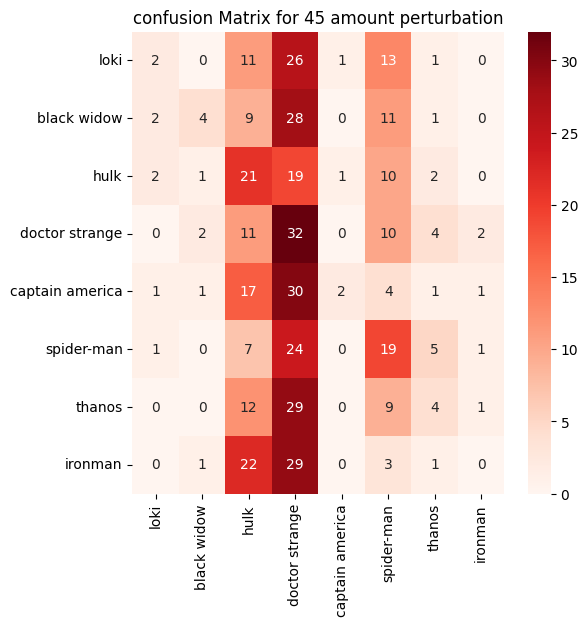

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/1750816916.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_bright_dec = df_bright_dec.append(df,ignore_index=True)


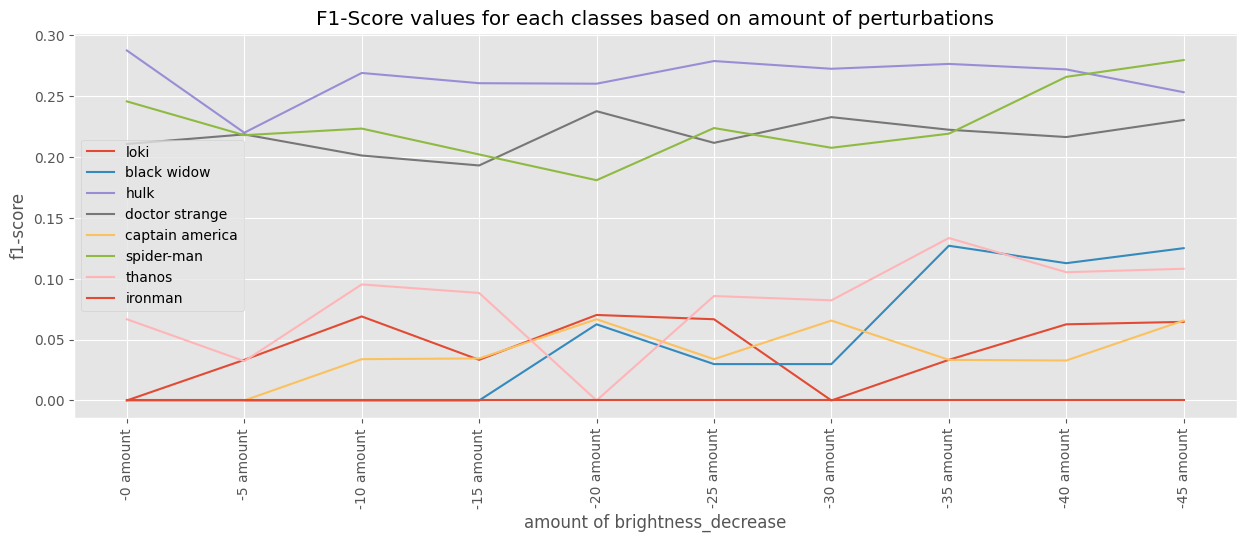

In [74]:
#brighness decrease
def brightDec(bright):
    model_labels=Applycontrastbright(1, -abs(bright))
    return classificationMetrics(true_=spY_test,prediction_=model_labels,class_labels=class_labels,amount_=bright)

inc_bright = 5
start_bright = 0

df_bright_dec = pd.DataFrame()
while start_bright <= 45:
    df = pd.DataFrame()
    df = pd.DataFrame(brightDec(start_bright))
    start_bright += inc_bright
    df_bright_dec = df_bright_dec.append(df,ignore_index=True)
    
#updating the Table
df_bright_dec['amount of brightness_decrease']=["-0 amount","-5 amount","-10 amount","-15 amount","-20 amount","-25 amount","-30 amount","-35 amount","-40 amount","-45 amount"]
df_bright_dec=df_bright_dec.set_index("amount of brightness_decrease")

with plt.style.context(style="ggplot"):
  lines_=df_bright_dec.plot.line(figsize=(15,5))
  plt.title(label="F1-Score values for each classes based on amount of perturbations")
  plt.ylabel(ylabel="f1-score")
  plt.xticks(range(0,len(df_bright_dec.index)), df_bright_dec.index)
  plt.xticks(rotation=90)
  plt.show()

model validation accuracy for 0 amount perturbation is 27.05% 

                 precision    recall  f1-score   support

           loki       0.24      0.15      0.18        54
    black widow       0.27      0.11      0.16        55
           hulk       0.31      0.25      0.28        56
 doctor strange       0.28      0.28      0.28        61
captain america       0.21      0.23      0.22        57
     spider-man       0.31      0.49      0.38        57
         thanos       0.25      0.24      0.24        55
        ironman       0.27      0.41      0.33        56

       accuracy                           0.27       451
      macro avg       0.27      0.27      0.26       451
   weighted avg       0.27      0.27      0.26       451



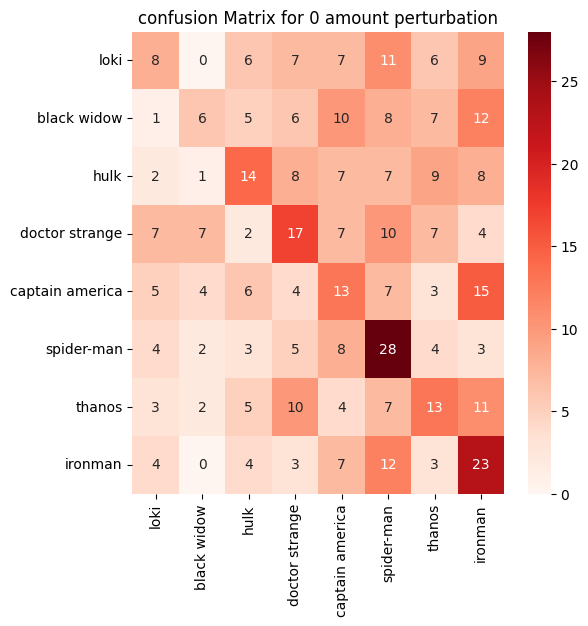

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/2341544996.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_guass_noise = df_guass_noise.append(df,ignore_index=True)


model validation accuracy for 2 amount perturbation is 12.42% 

                 precision    recall  f1-score   support

           loki       0.00      0.00      0.00        54
    black widow       0.14      0.02      0.03        55
           hulk       0.00      0.00      0.00        56
 doctor strange       0.00      0.00      0.00        61
captain america       0.00      0.00      0.00        57
     spider-man       0.12      0.96      0.22        57
         thanos       0.00      0.00      0.00        55
        ironman       0.00      0.00      0.00        56

       accuracy                           0.12       451
      macro avg       0.03      0.12      0.03       451
   weighted avg       0.03      0.12      0.03       451



/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaa

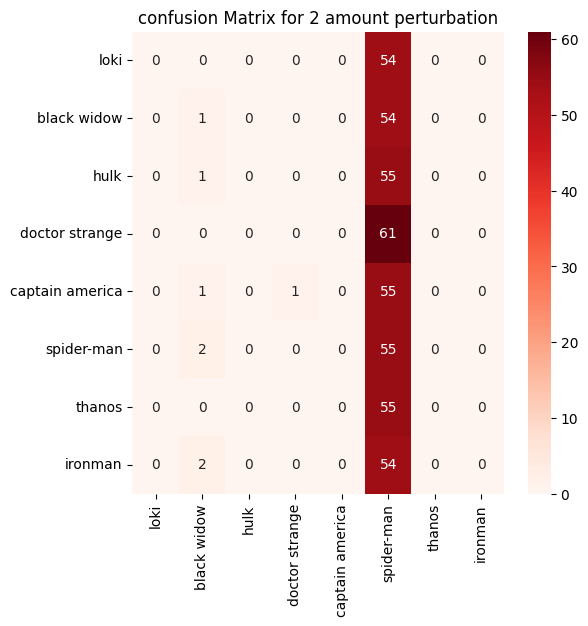

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/2341544996.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_guass_noise = df_guass_noise.append(df,ignore_index=True)


model validation accuracy for 4 amount perturbation is 12.42% 

                 precision    recall  f1-score   support

           loki       0.00      0.00      0.00        54
    black widow       0.00      0.00      0.00        55
           hulk       0.00      0.00      0.00        56
 doctor strange       0.00      0.00      0.00        61
captain america       0.00      0.00      0.00        57
     spider-man       0.13      0.98      0.22        57
         thanos       0.00      0.00      0.00        55
        ironman       0.00      0.00      0.00        56

       accuracy                           0.12       451
      macro avg       0.02      0.12      0.03       451
   weighted avg       0.02      0.12      0.03       451



/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaa

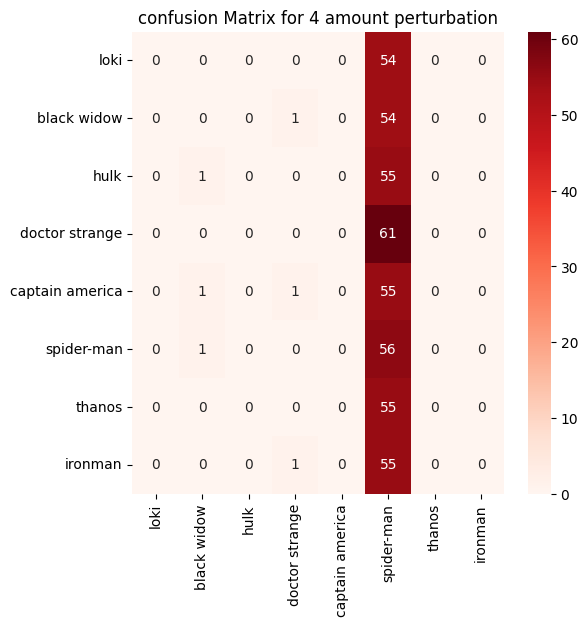

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/2341544996.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_guass_noise = df_guass_noise.append(df,ignore_index=True)


model validation accuracy for 6 amount perturbation is 12.42% 

                 precision    recall  f1-score   support

           loki       0.00      0.00      0.00        54
    black widow       0.17      0.02      0.03        55
           hulk       0.00      0.00      0.00        56
 doctor strange       0.00      0.00      0.00        61
captain america       0.00      0.00      0.00        57
     spider-man       0.12      0.96      0.22        57
         thanos       0.00      0.00      0.00        55
        ironman       0.00      0.00      0.00        56

       accuracy                           0.12       451
      macro avg       0.04      0.12      0.03       451
   weighted avg       0.04      0.12      0.03       451



/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaa

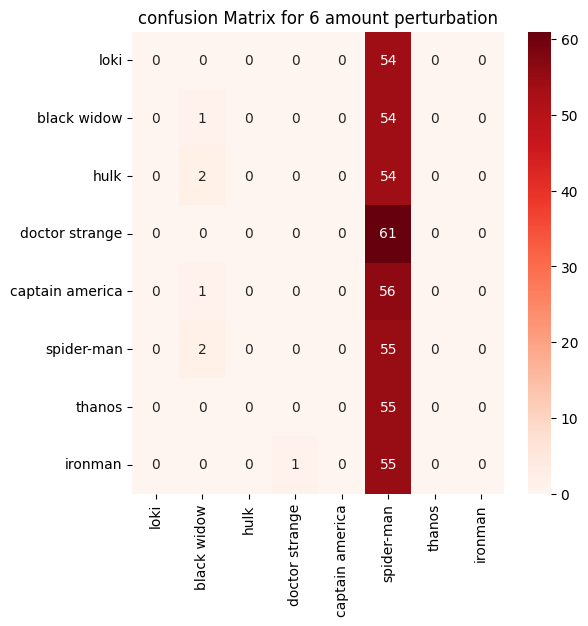

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/2341544996.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_guass_noise = df_guass_noise.append(df,ignore_index=True)


model validation accuracy for 8 amount perturbation is 12.64% 

                 precision    recall  f1-score   support

           loki       0.00      0.00      0.00        54
    black widow       0.17      0.02      0.03        55
           hulk       0.00      0.00      0.00        56
 doctor strange       0.00      0.00      0.00        61
captain america       0.00      0.00      0.00        57
     spider-man       0.13      0.98      0.22        57
         thanos       0.00      0.00      0.00        55
        ironman       0.00      0.00      0.00        56

       accuracy                           0.13       451
      macro avg       0.04      0.13      0.03       451
   weighted avg       0.04      0.13      0.03       451



/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaa

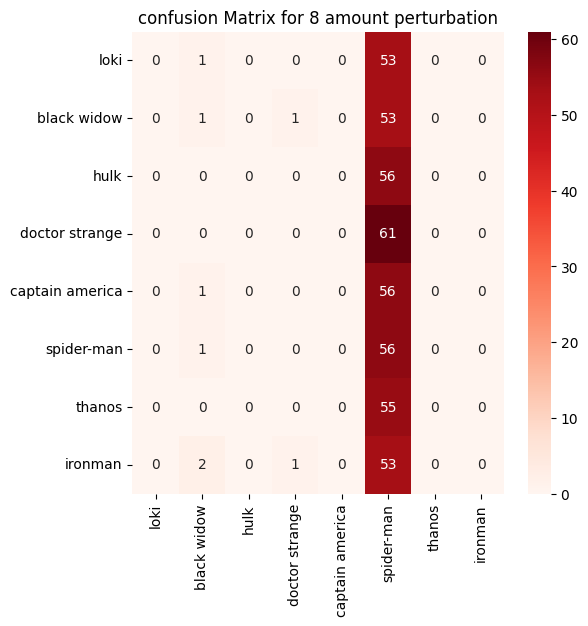

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/2341544996.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_guass_noise = df_guass_noise.append(df,ignore_index=True)


model validation accuracy for 10 amount perturbation is 12.86% 

                 precision    recall  f1-score   support

           loki       0.00      0.00      0.00        54
    black widow       0.38      0.05      0.10        55
           hulk       0.00      0.00      0.00        56
 doctor strange       0.00      0.00      0.00        61
captain america       0.00      0.00      0.00        57
     spider-man       0.12      0.96      0.22        57
         thanos       0.00      0.00      0.00        55
        ironman       0.00      0.00      0.00        56

       accuracy                           0.13       451
      macro avg       0.06      0.13      0.04       451
   weighted avg       0.06      0.13      0.04       451



/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaa

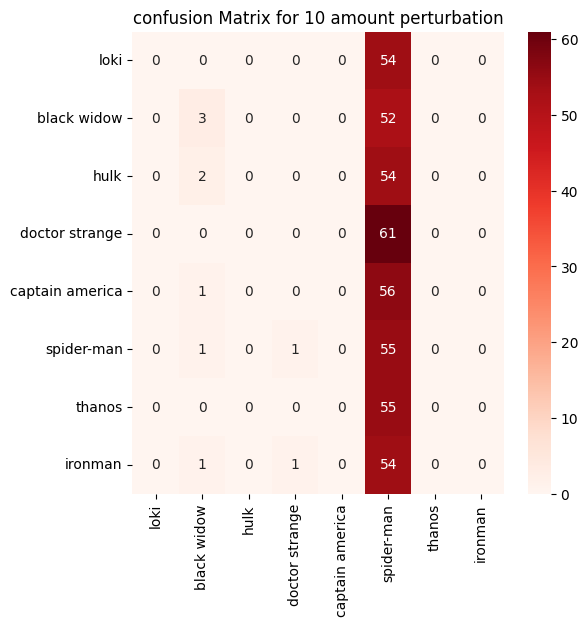

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/2341544996.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_guass_noise = df_guass_noise.append(df,ignore_index=True)


model validation accuracy for 12 amount perturbation is 12.64% 

                 precision    recall  f1-score   support

           loki       0.00      0.00      0.00        54
    black widow       0.17      0.02      0.03        55
           hulk       0.00      0.00      0.00        56
 doctor strange       0.00      0.00      0.00        61
captain america       0.00      0.00      0.00        57
     spider-man       0.13      0.98      0.22        57
         thanos       0.00      0.00      0.00        55
        ironman       0.00      0.00      0.00        56

       accuracy                           0.13       451
      macro avg       0.04      0.13      0.03       451
   weighted avg       0.04      0.13      0.03       451



/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaa

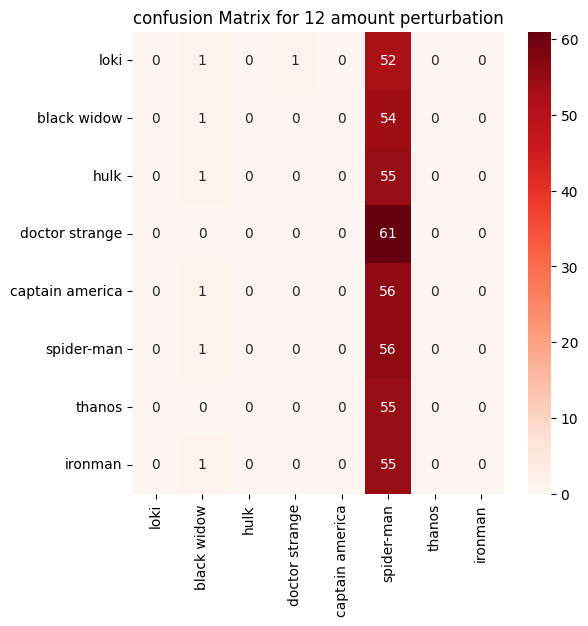

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/2341544996.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_guass_noise = df_guass_noise.append(df,ignore_index=True)


model validation accuracy for 14 amount perturbation is 12.64% 

                 precision    recall  f1-score   support

           loki       0.00      0.00      0.00        54
    black widow       0.25      0.02      0.03        55
           hulk       0.00      0.00      0.00        56
 doctor strange       0.00      0.00      0.00        61
captain america       0.00      0.00      0.00        57
     spider-man       0.13      0.98      0.22        57
         thanos       0.00      0.00      0.00        55
        ironman       0.00      0.00      0.00        56

       accuracy                           0.13       451
      macro avg       0.05      0.13      0.03       451
   weighted avg       0.05      0.13      0.03       451



/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaa

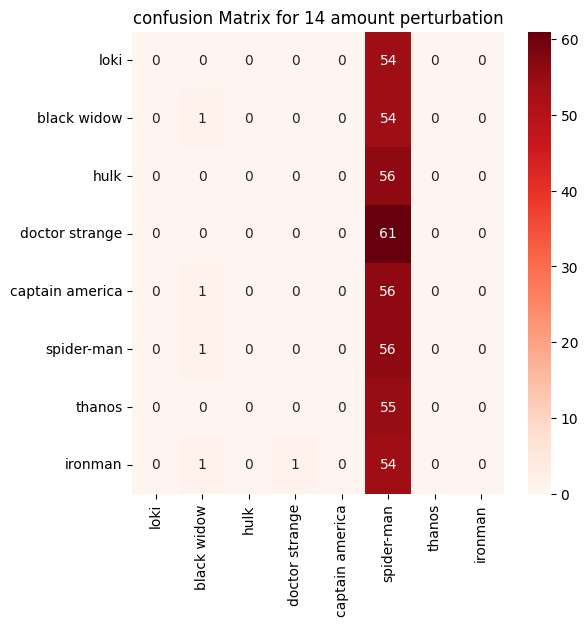

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/2341544996.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_guass_noise = df_guass_noise.append(df,ignore_index=True)
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklear

model validation accuracy for 16 amount perturbation is 12.42% 

                 precision    recall  f1-score   support

           loki       0.00      0.00      0.00        54
    black widow       0.20      0.02      0.03        55
           hulk       0.00      0.00      0.00        56
 doctor strange       0.00      0.00      0.00        61
captain america       0.00      0.00      0.00        57
     spider-man       0.12      0.96      0.22        57
         thanos       0.00      0.00      0.00        55
        ironman       0.00      0.00      0.00        56

       accuracy                           0.12       451
      macro avg       0.04      0.12      0.03       451
   weighted avg       0.04      0.12      0.03       451



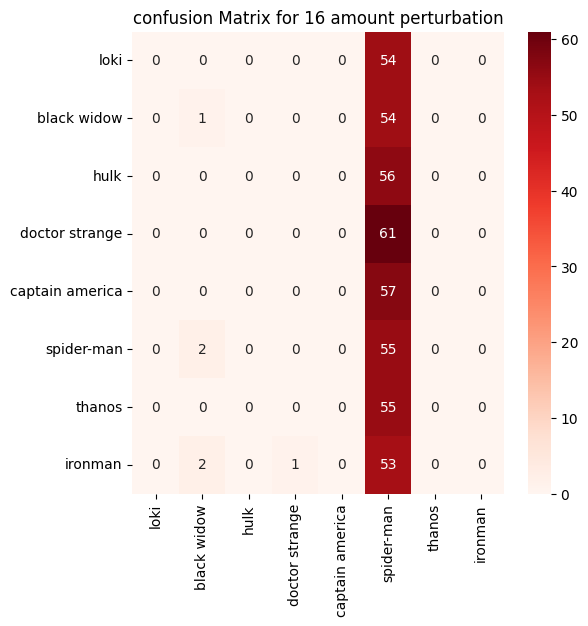

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/2341544996.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_guass_noise = df_guass_noise.append(df,ignore_index=True)


model validation accuracy for 18 amount perturbation is 12.64% 

                 precision    recall  f1-score   support

           loki       0.00      0.00      0.00        54
    black widow       0.20      0.02      0.03        55
           hulk       0.00      0.00      0.00        56
 doctor strange       0.00      0.00      0.00        61
captain america       0.00      0.00      0.00        57
     spider-man       0.13      0.98      0.22        57
         thanos       0.00      0.00      0.00        55
        ironman       0.00      0.00      0.00        56

       accuracy                           0.13       451
      macro avg       0.04      0.13      0.03       451
   weighted avg       0.04      0.13      0.03       451



/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaa

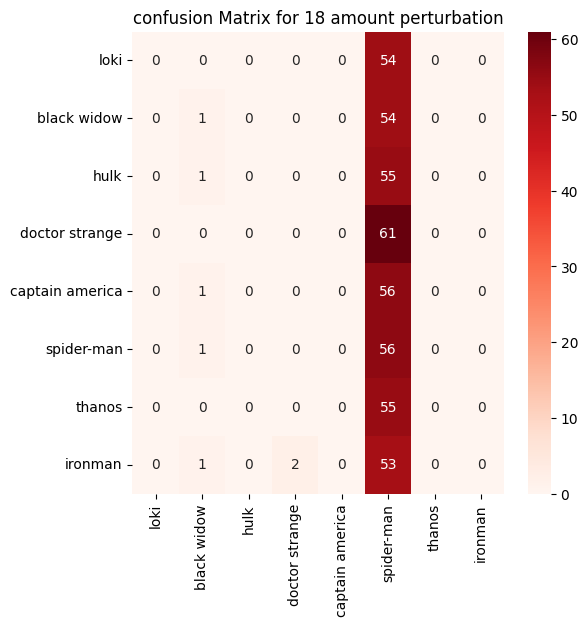

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/2341544996.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_guass_noise = df_guass_noise.append(df,ignore_index=True)


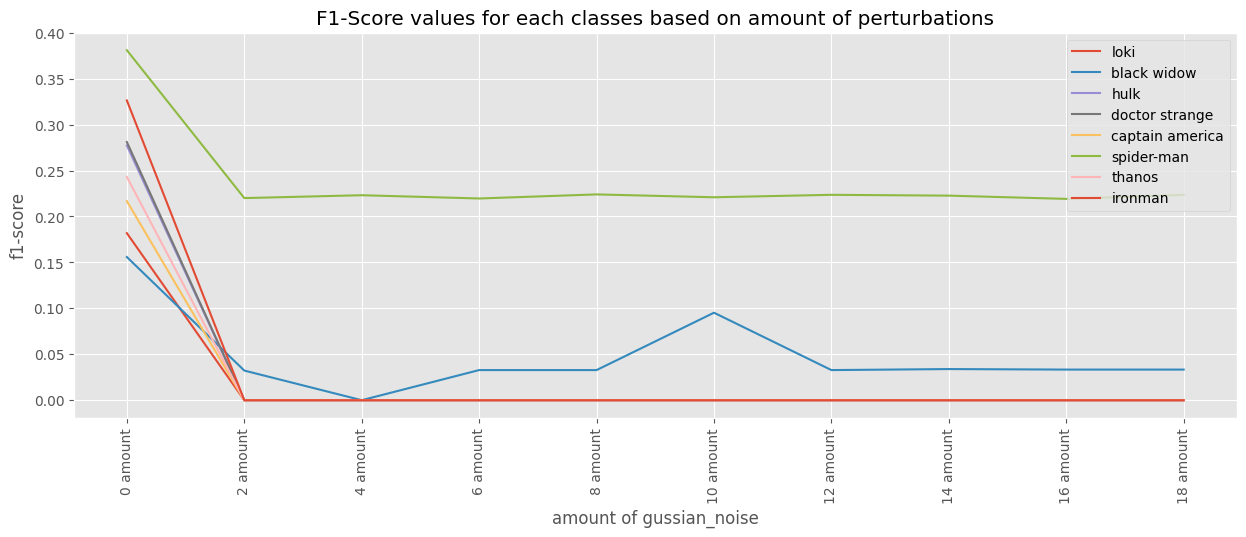

In [76]:
#guassian noise
def guassianNoise(nVal):
    model_labels=Applyinggussainnoise(nVal)
    return classificationMetrics(true_=spY_test,prediction_=model_labels,class_labels=class_labels,amount_=nVal)

nVal = 0
df_guass_noise = pd.DataFrame()
while nVal<=18:
    df = pd.DataFrame()
    df = pd.DataFrame(guassianNoise(nVal))
    nVal += 2
    df_guass_noise = df_guass_noise.append(df,ignore_index=True)
    
df_guass_noise['amount of gussian_noise']=["0 amount","2 amount","4 amount","6 amount","8 amount","10 amount","12 amount","14 amount","16 amount","18 amount"]
df_guass_noise=df_guass_noise.set_index("amount of gussian_noise")
df_guass_noise.head(10)

with plt.style.context(style="ggplot"):
  lines_=df_guass_noise.plot.line(figsize=(15,5))
  plt.title(label="F1-Score values for each classes based on amount of perturbations")
  plt.ylabel(ylabel="f1-score")
  plt.xticks(range(0,len(df_guass_noise.index)), df_guass_noise.index)
  plt.xticks(rotation=90)
  plt.show()

model validation accuracy for 0 amount perturbation is 15.96% 

                 precision    recall  f1-score   support

           loki       0.29      0.04      0.07        54
    black widow       0.04      0.02      0.02        55
           hulk       0.20      0.41      0.27        56
 doctor strange       0.18      0.16      0.17        61
captain america       0.25      0.02      0.03        57
     spider-man       0.15      0.58      0.23        57
         thanos       0.17      0.04      0.06        55
        ironman       0.00      0.00      0.00        56

       accuracy                           0.16       451
      macro avg       0.16      0.16      0.11       451
   weighted avg       0.16      0.16      0.11       451



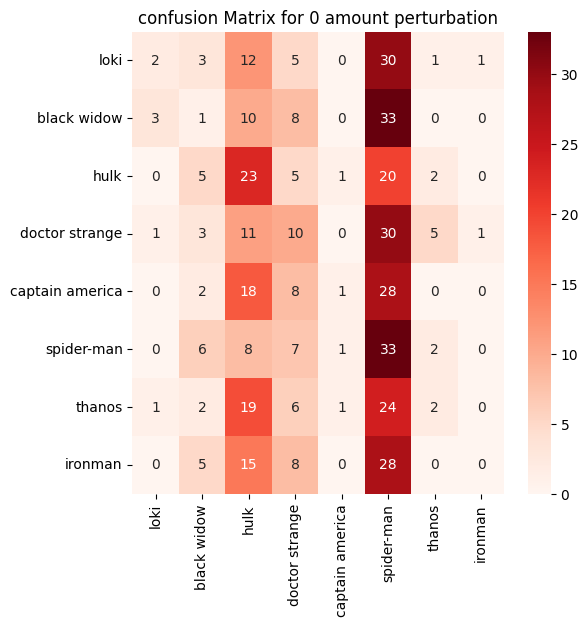

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/893358029.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_guass = df_guass.append(df,ignore_index=True)


model validation accuracy for 1 amount perturbation is 16.19% 

                 precision    recall  f1-score   support

           loki       0.29      0.04      0.07        54
    black widow       0.10      0.05      0.07        55
           hulk       0.20      0.43      0.27        56
 doctor strange       0.17      0.15      0.16        61
captain america       0.25      0.02      0.03        57
     spider-man       0.15      0.56      0.23        57
         thanos       0.13      0.04      0.06        55
        ironman       0.00      0.00      0.00        56

       accuracy                           0.16       451
      macro avg       0.16      0.16      0.11       451
   weighted avg       0.16      0.16      0.11       451



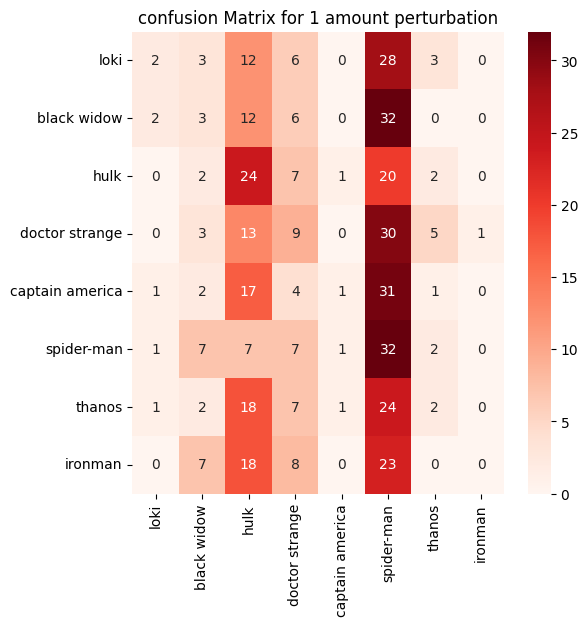

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/893358029.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_guass = df_guass.append(df,ignore_index=True)


model validation accuracy for 2 amount perturbation is 15.96% 

                 precision    recall  f1-score   support

           loki       0.10      0.02      0.03        54
    black widow       0.14      0.07      0.10        55
           hulk       0.20      0.46      0.28        56
 doctor strange       0.15      0.13      0.14        61
captain america       0.17      0.02      0.03        57
     spider-man       0.14      0.53      0.22        57
         thanos       0.22      0.04      0.06        55
        ironman       0.00      0.00      0.00        56

       accuracy                           0.16       451
      macro avg       0.14      0.16      0.11       451
   weighted avg       0.14      0.16      0.11       451



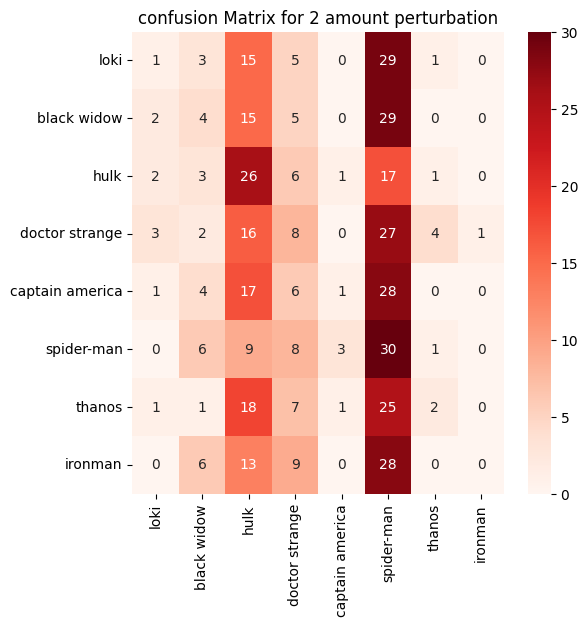

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/893358029.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_guass = df_guass.append(df,ignore_index=True)


model validation accuracy for 3 amount perturbation is 15.52% 

                 precision    recall  f1-score   support

           loki       0.10      0.02      0.03        54
    black widow       0.03      0.02      0.02        55
           hulk       0.20      0.46      0.28        56
 doctor strange       0.17      0.15      0.16        61
captain america       0.20      0.02      0.03        57
     spider-man       0.14      0.53      0.22        57
         thanos       0.20      0.04      0.06        55
        ironman       0.00      0.00      0.00        56

       accuracy                           0.16       451
      macro avg       0.13      0.15      0.10       451
   weighted avg       0.13      0.16      0.10       451



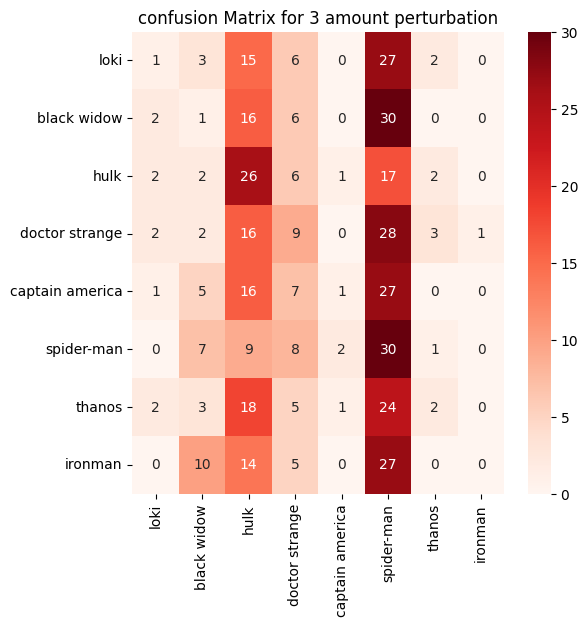

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/893358029.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_guass = df_guass.append(df,ignore_index=True)


model validation accuracy for 4 amount perturbation is 15.52% 

                 precision    recall  f1-score   support

           loki       0.10      0.02      0.03        54
    black widow       0.03      0.02      0.02        55
           hulk       0.20      0.46      0.28        56
 doctor strange       0.17      0.15      0.16        61
captain america       0.20      0.02      0.03        57
     spider-man       0.14      0.53      0.22        57
         thanos       0.20      0.04      0.06        55
        ironman       0.00      0.00      0.00        56

       accuracy                           0.16       451
      macro avg       0.13      0.15      0.10       451
   weighted avg       0.13      0.16      0.10       451



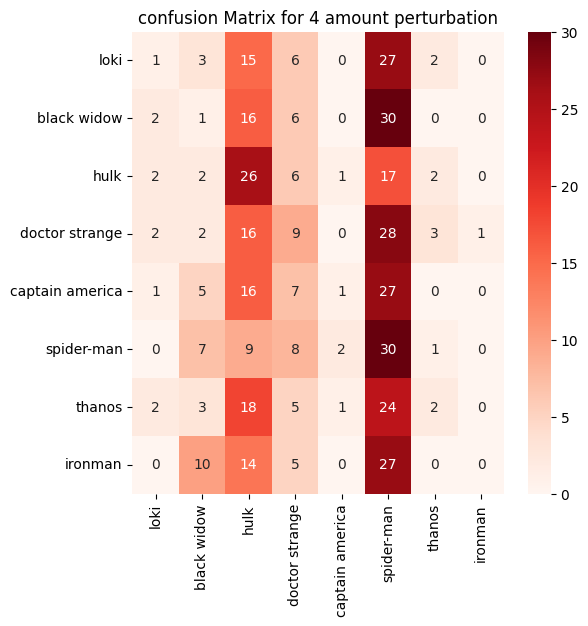

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/893358029.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_guass = df_guass.append(df,ignore_index=True)


model validation accuracy for 5 amount perturbation is 15.96% 

                 precision    recall  f1-score   support

           loki       0.15      0.04      0.06        54
    black widow       0.10      0.05      0.07        55
           hulk       0.19      0.43      0.26        56
 doctor strange       0.17      0.13      0.15        61
captain america       0.17      0.02      0.03        57
     spider-man       0.15      0.56      0.24        57
         thanos       0.22      0.04      0.06        55
        ironman       0.00      0.00      0.00        56

       accuracy                           0.16       451
      macro avg       0.14      0.16      0.11       451
   weighted avg       0.14      0.16      0.11       451



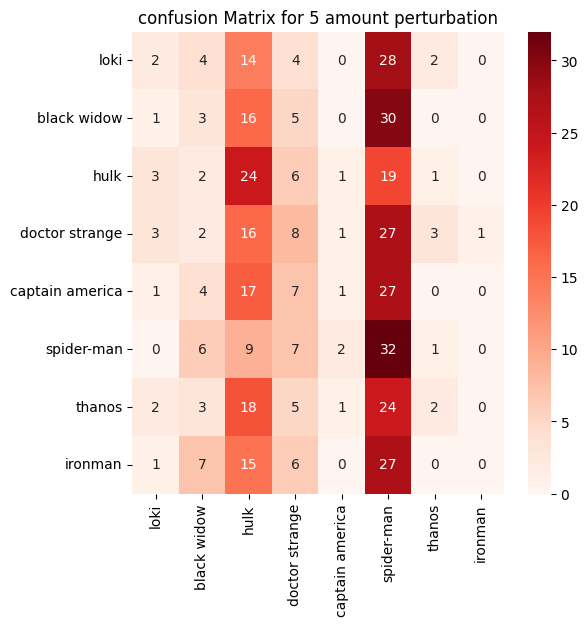

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/893358029.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_guass = df_guass.append(df,ignore_index=True)


model validation accuracy for 6 amount perturbation is 15.96% 

                 precision    recall  f1-score   support

           loki       0.15      0.04      0.06        54
    black widow       0.10      0.05      0.07        55
           hulk       0.19      0.43      0.26        56
 doctor strange       0.17      0.13      0.15        61
captain america       0.17      0.02      0.03        57
     spider-man       0.15      0.56      0.24        57
         thanos       0.22      0.04      0.06        55
        ironman       0.00      0.00      0.00        56

       accuracy                           0.16       451
      macro avg       0.14      0.16      0.11       451
   weighted avg       0.14      0.16      0.11       451



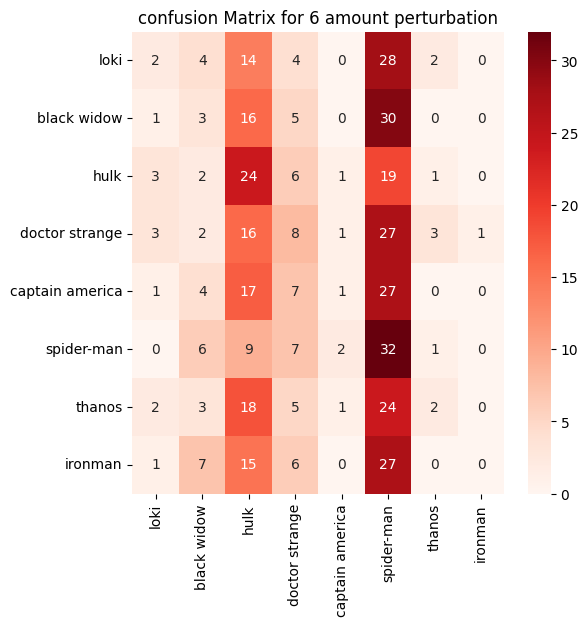

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/893358029.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_guass = df_guass.append(df,ignore_index=True)


model validation accuracy for 7 amount perturbation is 15.96% 

                 precision    recall  f1-score   support

           loki       0.15      0.04      0.06        54
    black widow       0.10      0.05      0.07        55
           hulk       0.19      0.43      0.26        56
 doctor strange       0.17      0.13      0.15        61
captain america       0.17      0.02      0.03        57
     spider-man       0.15      0.56      0.24        57
         thanos       0.22      0.04      0.06        55
        ironman       0.00      0.00      0.00        56

       accuracy                           0.16       451
      macro avg       0.14      0.16      0.11       451
   weighted avg       0.14      0.16      0.11       451



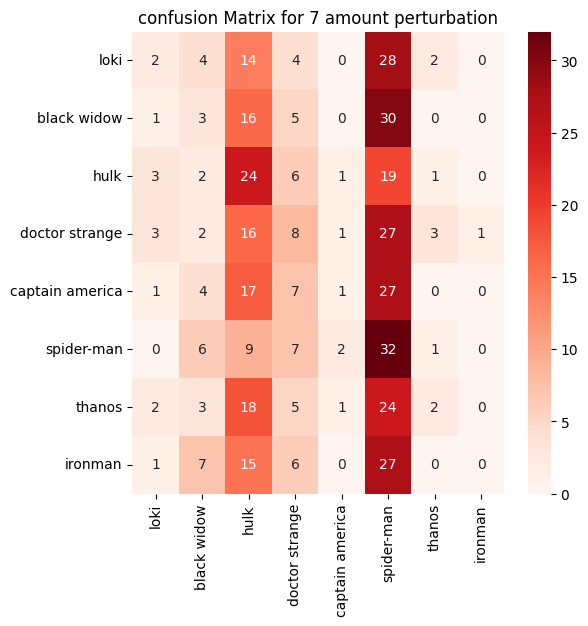

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/893358029.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_guass = df_guass.append(df,ignore_index=True)


model validation accuracy for 8 amount perturbation is 15.96% 

                 precision    recall  f1-score   support

           loki       0.15      0.04      0.06        54
    black widow       0.10      0.05      0.07        55
           hulk       0.19      0.43      0.26        56
 doctor strange       0.17      0.13      0.15        61
captain america       0.17      0.02      0.03        57
     spider-man       0.15      0.56      0.24        57
         thanos       0.22      0.04      0.06        55
        ironman       0.00      0.00      0.00        56

       accuracy                           0.16       451
      macro avg       0.14      0.16      0.11       451
   weighted avg       0.14      0.16      0.11       451



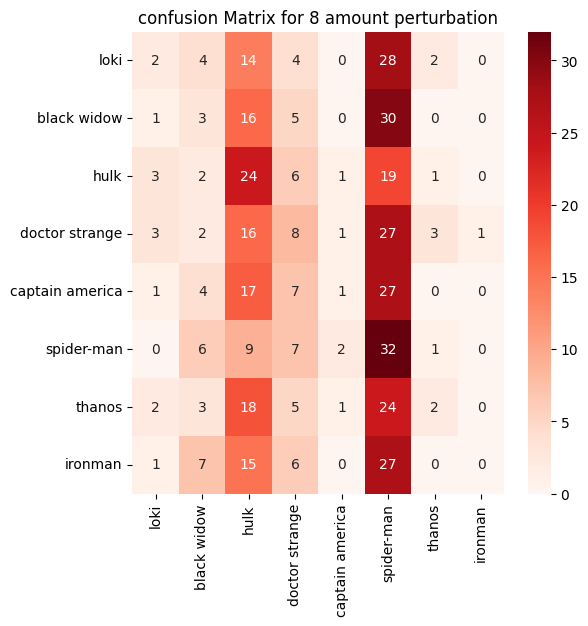

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/893358029.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_guass = df_guass.append(df,ignore_index=True)


model validation accuracy for 9 amount perturbation is 15.96% 

                 precision    recall  f1-score   support

           loki       0.15      0.04      0.06        54
    black widow       0.10      0.05      0.07        55
           hulk       0.19      0.43      0.26        56
 doctor strange       0.17      0.13      0.15        61
captain america       0.17      0.02      0.03        57
     spider-man       0.15      0.56      0.24        57
         thanos       0.22      0.04      0.06        55
        ironman       0.00      0.00      0.00        56

       accuracy                           0.16       451
      macro avg       0.14      0.16      0.11       451
   weighted avg       0.14      0.16      0.11       451



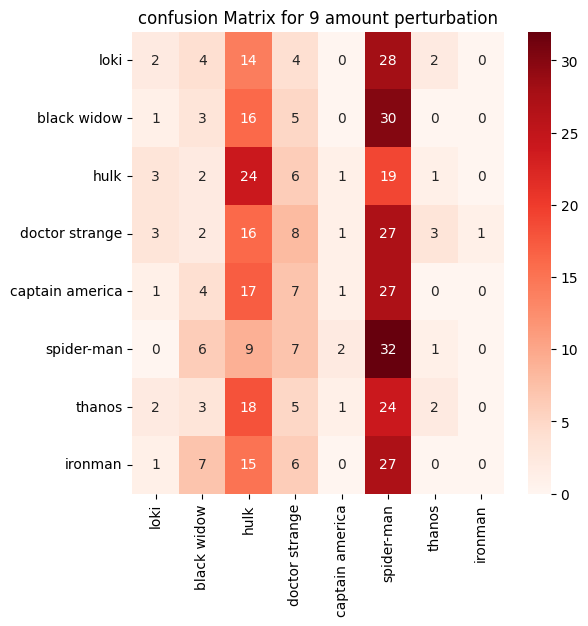

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/893358029.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_guass = df_guass.append(df,ignore_index=True)


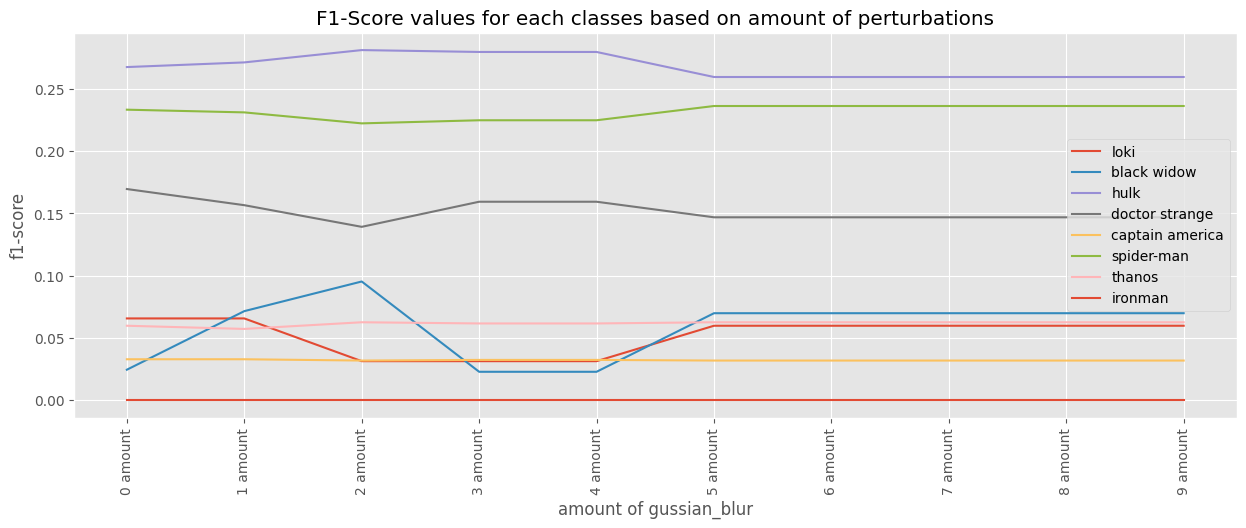

In [77]:
#Guassian blur

def guassianBlur(cVal):
    model_labels = Applygussianblur(cVal)
    return classificationMetrics(true_=spY_test,prediction_=model_labels,class_labels=class_labels,amount_=cVal)

cVal = 0
df_guass = pd.DataFrame()
while cVal<=9:
    df = pd.DataFrame()
    df = pd.DataFrame(guassianBlur(cVal))
    cVal += 1
    df_guass = df_guass.append(df,ignore_index=True)

#updating the Table
df_guass['amount of gussian_blur']=["0 amount","1 amount","2 amount","3 amount","4 amount","5 amount","6 amount","7 amount","8 amount","9 amount"]
df_guass=df_guass.set_index("amount of gussian_blur")


with plt.style.context(style="ggplot"):
  lines_=df_guass.plot.line(figsize=(15,5))
  plt.title(label="F1-Score values for each classes based on amount of perturbations")
  plt.ylabel(ylabel="f1-score")
  plt.xticks(range(0,len(df_guass.index)), df_guass.index)
  plt.xticks(rotation=90)
  plt.show()


model validation accuracy for 0 amount perturbation is 16.19% 

                 precision    recall  f1-score   support

           loki       0.25      0.02      0.03        54
    black widow       0.10      0.02      0.03        55
           hulk       0.22      0.29      0.25        56
 doctor strange       0.16      0.26      0.20        61
captain america       0.00      0.00      0.00        57
     spider-man       0.15      0.67      0.24        57
         thanos       0.33      0.02      0.03        55
        ironman       0.00      0.00      0.00        56

       accuracy                           0.16       451
      macro avg       0.15      0.16      0.10       451
   weighted avg       0.15      0.16      0.10       451



/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaa

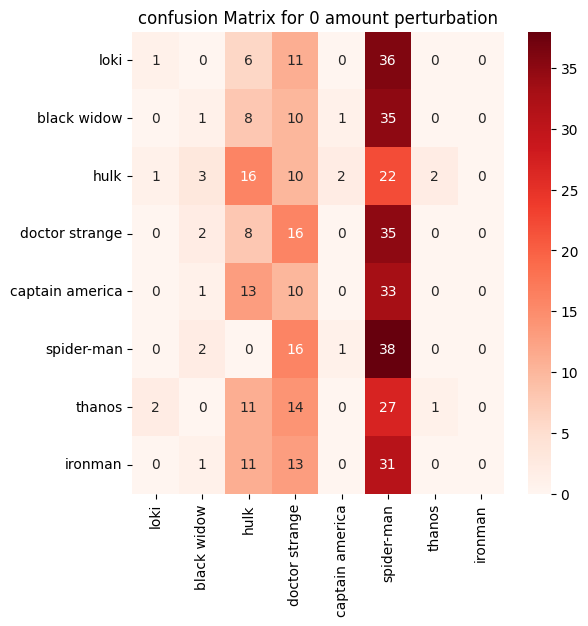

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/20194030.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_occ = df_occ.append(df,ignore_index=True)


model validation accuracy for 5 amount perturbation is 15.74% 

                 precision    recall  f1-score   support

           loki       0.25      0.02      0.03        54
    black widow       0.10      0.02      0.03        55
           hulk       0.21      0.27      0.23        56
 doctor strange       0.16      0.26      0.20        61
captain america       0.00      0.00      0.00        57
     spider-man       0.15      0.67      0.24        57
         thanos       0.00      0.00      0.00        55
        ironman       0.00      0.00      0.00        56

       accuracy                           0.16       451
      macro avg       0.11      0.15      0.09       451
   weighted avg       0.11      0.16      0.09       451



/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaa

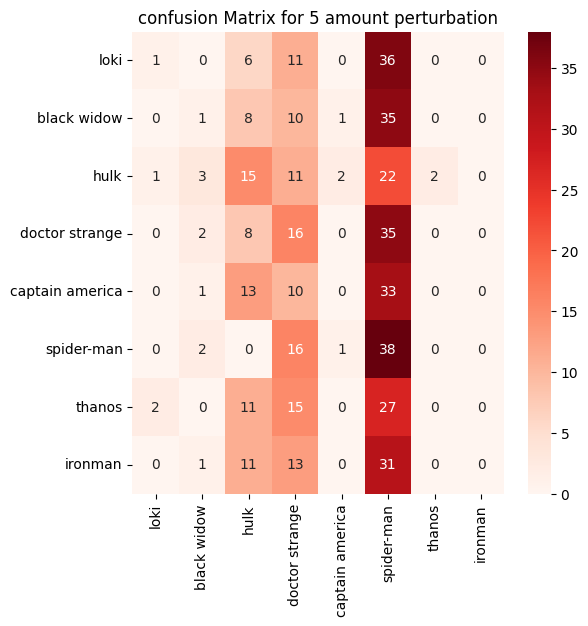

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/20194030.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_occ = df_occ.append(df,ignore_index=True)


model validation accuracy for 10 amount perturbation is 16.41% 

                 precision    recall  f1-score   support

           loki       0.25      0.02      0.03        54
    black widow       0.11      0.02      0.03        55
           hulk       0.21      0.27      0.23        56
 doctor strange       0.18      0.28      0.22        61
captain america       0.00      0.00      0.00        57
     spider-man       0.15      0.70      0.25        57
         thanos       0.00      0.00      0.00        55
        ironman       0.00      0.00      0.00        56

       accuracy                           0.16       451
      macro avg       0.11      0.16      0.10       451
   weighted avg       0.11      0.16      0.10       451



/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaa

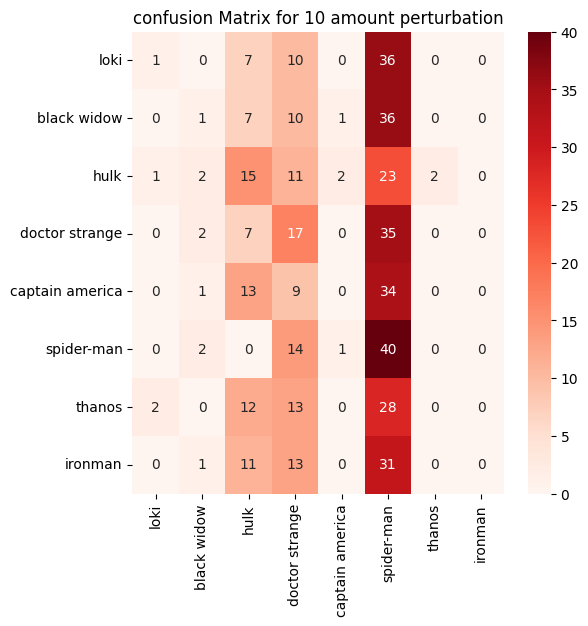

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/20194030.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_occ = df_occ.append(df,ignore_index=True)
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classif

model validation accuracy for 15 amount perturbation is 16.41% 

                 precision    recall  f1-score   support

           loki       0.25      0.02      0.03        54
    black widow       0.08      0.02      0.03        55
           hulk       0.22      0.27      0.24        56
 doctor strange       0.17      0.28      0.21        61
captain america       0.00      0.00      0.00        57
     spider-man       0.15      0.68      0.25        57
         thanos       0.33      0.02      0.03        55
        ironman       0.00      0.00      0.00        56

       accuracy                           0.16       451
      macro avg       0.15      0.16      0.10       451
   weighted avg       0.15      0.16      0.10       451



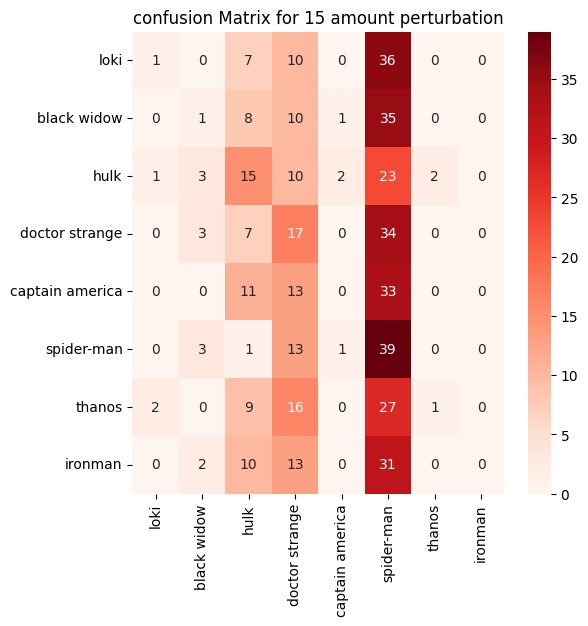

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/20194030.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_occ = df_occ.append(df,ignore_index=True)


model validation accuracy for 20 amount perturbation is 15.74% 

                 precision    recall  f1-score   support

           loki       0.25      0.02      0.03        54
    black widow       0.10      0.02      0.03        55
           hulk       0.20      0.25      0.22        56
 doctor strange       0.17      0.28      0.21        61
captain america       0.00      0.00      0.00        57
     spider-man       0.15      0.67      0.24        57
         thanos       0.00      0.00      0.00        55
        ironman       0.00      0.00      0.00        56

       accuracy                           0.16       451
      macro avg       0.11      0.15      0.09       451
   weighted avg       0.11      0.16      0.09       451



/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaa

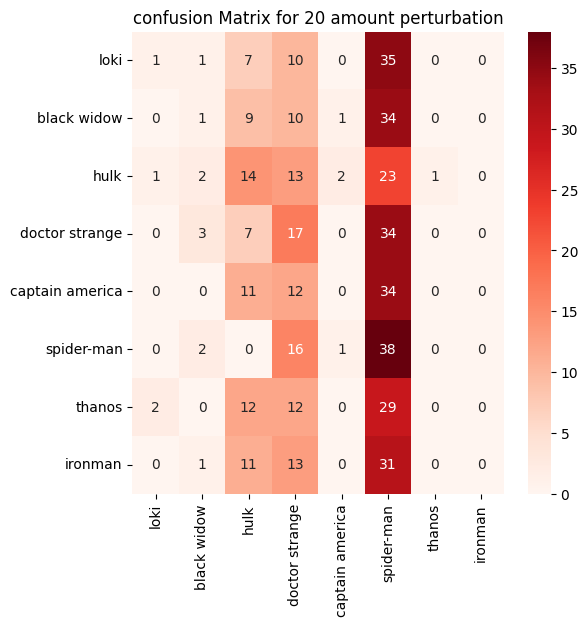

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/20194030.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_occ = df_occ.append(df,ignore_index=True)


model validation accuracy for 25 amount perturbation is 15.74% 

                 precision    recall  f1-score   support

           loki       0.25      0.02      0.03        54
    black widow       0.08      0.02      0.03        55
           hulk       0.22      0.25      0.23        56
 doctor strange       0.17      0.28      0.21        61
captain america       0.00      0.00      0.00        57
     spider-man       0.14      0.67      0.24        57
         thanos       0.00      0.00      0.00        55
        ironman       0.00      0.00      0.00        56

       accuracy                           0.16       451
      macro avg       0.11      0.15      0.09       451
   weighted avg       0.11      0.16      0.09       451



/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaa

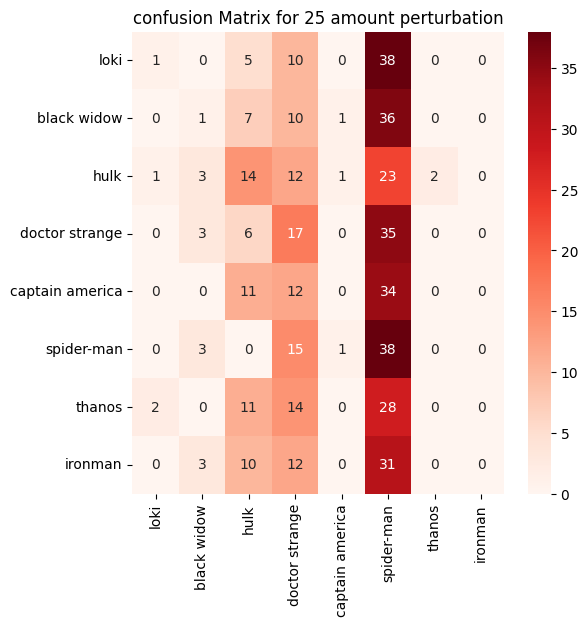

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/20194030.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_occ = df_occ.append(df,ignore_index=True)


model validation accuracy for 30 amount perturbation is 16.19% 

                 precision    recall  f1-score   support

           loki       0.25      0.02      0.03        54
    black widow       0.00      0.00      0.00        55
           hulk       0.19      0.25      0.22        56
 doctor strange       0.18      0.31      0.23        61
captain america       0.00      0.00      0.00        57
     spider-man       0.15      0.67      0.24        57
         thanos       0.33      0.02      0.03        55
        ironman       0.00      0.00      0.00        56

       accuracy                           0.16       451
      macro avg       0.14      0.16      0.10       451
   weighted avg       0.14      0.16      0.10       451



/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaa

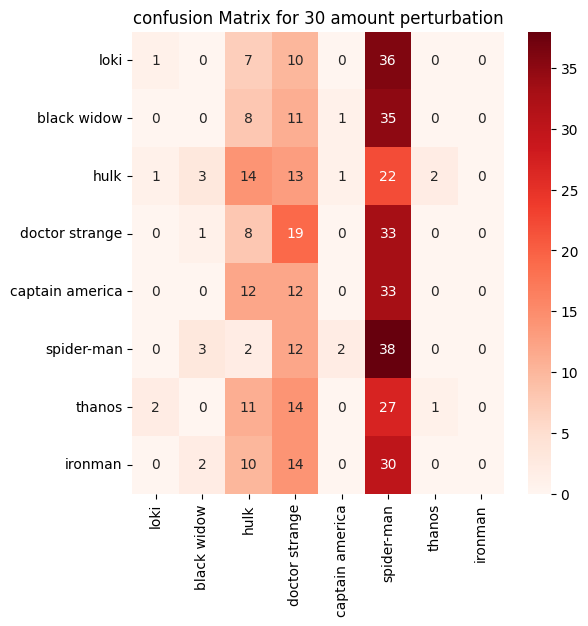

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/20194030.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_occ = df_occ.append(df,ignore_index=True)


model validation accuracy for 35 amount perturbation is 15.30% 

                 precision    recall  f1-score   support

           loki       0.20      0.02      0.03        54
    black widow       0.00      0.00      0.00        55
           hulk       0.19      0.23      0.21        56
 doctor strange       0.16      0.28      0.20        61
captain america       0.00      0.00      0.00        57
     spider-man       0.15      0.67      0.24        57
         thanos       0.00      0.00      0.00        55
        ironman       0.00      0.00      0.00        56

       accuracy                           0.15       451
      macro avg       0.09      0.15      0.09       451
   weighted avg       0.09      0.15      0.09       451



/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaa

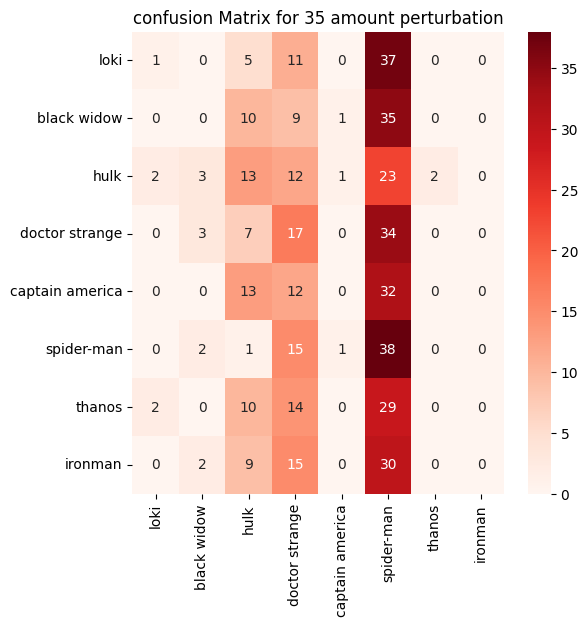

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/20194030.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_occ = df_occ.append(df,ignore_index=True)


model validation accuracy for 40 amount perturbation is 16.41% 

                 precision    recall  f1-score   support

           loki       0.14      0.02      0.03        54
    black widow       0.14      0.02      0.03        55
           hulk       0.22      0.29      0.25        56
 doctor strange       0.17      0.30      0.21        61
captain america       0.00      0.00      0.00        57
     spider-man       0.15      0.67      0.25        57
         thanos       0.00      0.00      0.00        55
        ironman       0.00      0.00      0.00        56

       accuracy                           0.16       451
      macro avg       0.10      0.16      0.10       451
   weighted avg       0.10      0.16      0.10       451



/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaa

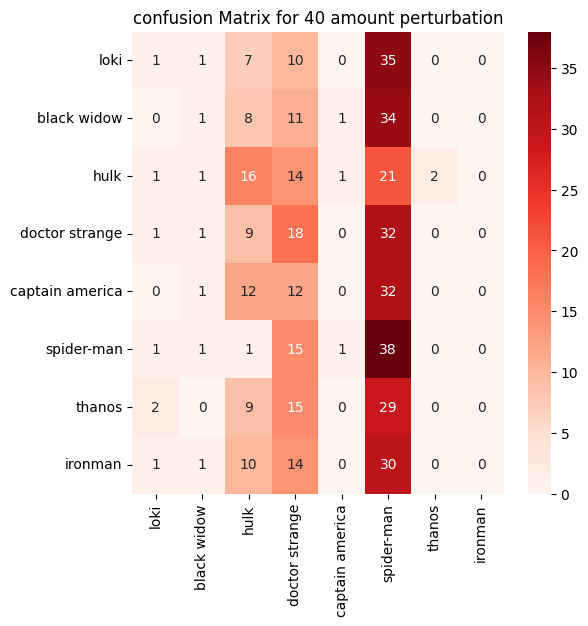

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/20194030.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_occ = df_occ.append(df,ignore_index=True)


model validation accuracy for 45 amount perturbation is 16.19% 

                 precision    recall  f1-score   support

           loki       0.14      0.02      0.03        54
    black widow       0.14      0.02      0.03        55
           hulk       0.22      0.29      0.25        56
 doctor strange       0.16      0.28      0.20        61
captain america       0.00      0.00      0.00        57
     spider-man       0.15      0.67      0.25        57
         thanos       0.00      0.00      0.00        55
        ironman       0.00      0.00      0.00        56

       accuracy                           0.16       451
      macro avg       0.10      0.16      0.10       451
   weighted avg       0.10      0.16      0.10       451



/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaamir/venv-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zainaa

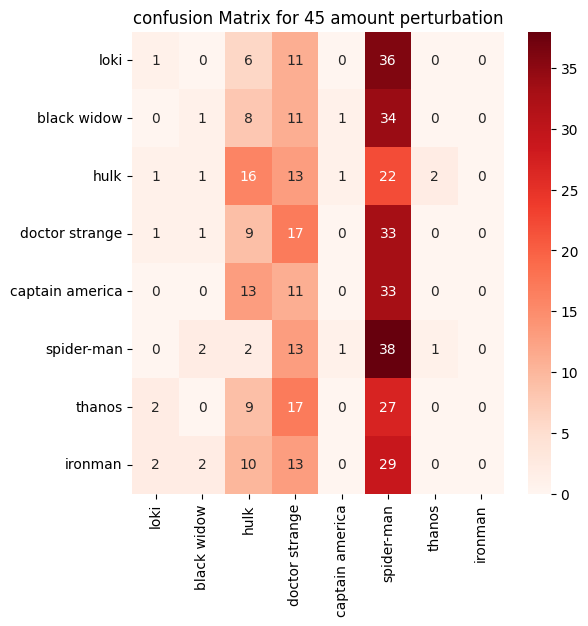

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_24736/20194030.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_occ = df_occ.append(df,ignore_index=True)


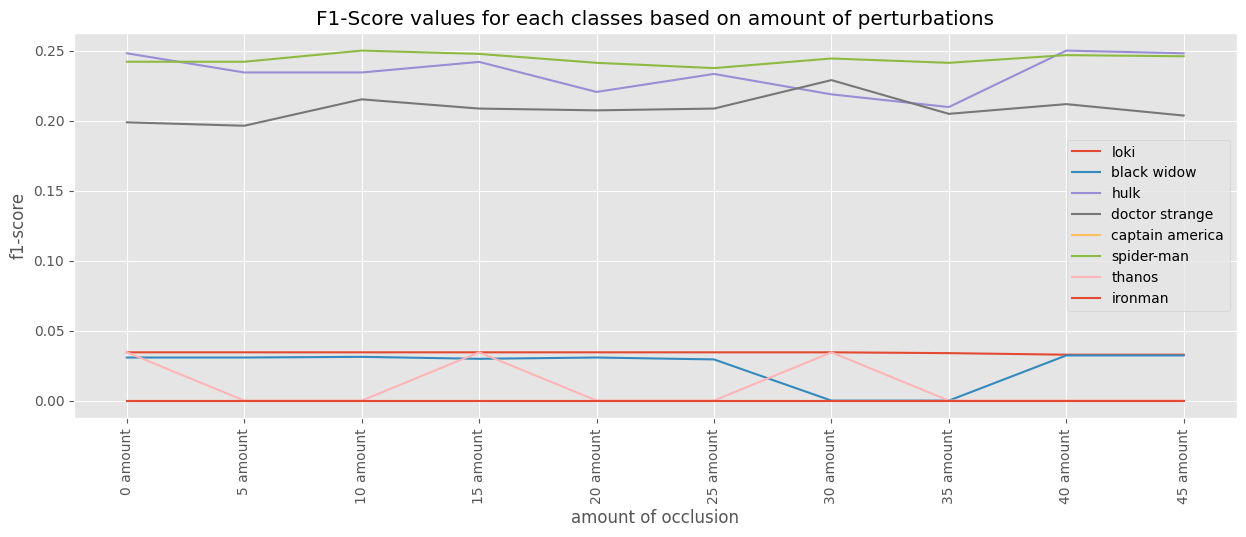

In [80]:
#occulusion

def occulusion(oVal):
    model_labels = Applyocclusion(oVal)
    return classificationMetrics(true_=spY_test,prediction_=model_labels,class_labels=class_labels,amount_=oVal)
oVal = 0
df_occ = pd.DataFrame()
while oVal<=45:
    df = pd.DataFrame()
    df = pd.DataFrame(occulusion(oVal))
    oVal += 5
    df_occ = df_occ.append(df,ignore_index=True)

#updating the Table
df_occ['amount of occlusion']=["0 amount","5 amount","10 amount","15 amount","20 amount","25 amount","30 amount","35 amount","40 amount","45 amount"]
df_occ=df_occ.set_index("amount of occlusion")

with plt.style.context(style="ggplot"):
  lines_=df_occ.plot.line(figsize=(15,5))
  plt.title(label="F1-Score values for each classes based on amount of perturbations")
  plt.ylabel(ylabel="f1-score")
  plt.xticks(range(0,len(df_occ.index)), df_occ.index)
  plt.xticks(rotation=90)
  plt.show()